# **HACKATHON** - Group 10 - Clement Guyot de la Pommeraye, Erik van der Sangen, Jacopo Cagnacci, Giacomo Bellodi

**Time spent**: 6hrs per team memeber

**Level of difficulty**: 8.5/10

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

## **Load data**

In [ ]:
#load all sigwatch datasets
data10 = pd.read_stata('/content/2010_data_sigwatch.dta')
data11 = pd.read_stata('/content/2011_data_sigwatch.dta')
data12 = pd.read_stata('/content/2012_data_sigwatch.dta')
data13 = pd.read_stata('/content/2013_data_sigwatch.dta')
data14 = pd.read_stata('/content/2014_data_sigwatch.dta')
data15 = pd.read_stata('/content/2015_data_sigwatch.dta')
data16 = pd.read_stata('/content/2016_data_sigwatch.dta')
data17 = pd.read_stata('/content/2017_data_sigwatch.dta')
data18 = pd.read_stata('/content/2018_data_sigwatch.dta')



In [ ]:
#concatenate data
data = pd.concat([data10, data11, data12, data13, data14, data15, data16, data17, data18])
data.columns

Index(['uid_archive', 'date', 'company_code', 'company', 'company_type',
       'company_parent_code', 'company_parent', 'company_parent_country',
       'sentiment', 'prominence', 'partnership', 'issue_code1', 'issue_name1',
       'issue_code2', 'issue_name2', 'issue_code3', 'issue_name3',
       'active_country_code1', 'active_country1', 'active_country_code2',
       'active_country2', 'active_country_code3', 'active_country3',
       'active_country_code4', 'active_country4', 'active_country_code5',
       'active_country5', 'active_country_code6', 'active_country6',
       'target_country_code1', 'target_country1', 'target_country_code2',
       'target_country2', 'target_country_code3', 'target_country3',
       'target_country_code4', 'target_country4', 'target_country_code5',
       'target_country5', 'target_country_code6', 'target_country6',
       'ngo_code1', 'ngo_name1', 'ngo_power1', 'ngo_country_code1',
       'ngo_country1', 'ngo_code2', 'ngo_name2', 'ngo_power2',
    

In [ ]:
data['company_parent_country'].unique()

array(['US', 'Germany', 'Sweden', 'Switzerland', 'Italy', 'Brazil',
       'Indonesia', 'Spain', 'Canada', 'France', 'Japan', 'Malaysia',
       'Iceland', 'Norway', 'Netherlands', 'Australia', 'UK', 'Russia',
       'Mexico', 'Belgium', 'Argentina', 'Cameroon', 'Chile', 'Poland',
       'South Korea', 'South Africa', 'Bangladesh', 'Finland', 'China',
       'Hong Kong SAR of China', 'Bolivia', 'Denmark', 'Ethiopia',
       'Saudi Arabia', 'EU-Brussels', 'New Zealand', 'Peru', 'Thailand',
       'Honduras', 'Papua New Guinea', 'Philippines', 'Singapore',
       'Nigeria', 'Botswana', 'India', 'Myanmar', 'Taiwan', 'Guatemala',
       'Ireland', 'El Salvador', 'Hungary', 'Austria', 'Portugal',
       'Paraguay', 'Czech Republic', 'Zimbabwe', 'Turkey',
       'Trinidad and Tobago', 'Israel', 'Pakistan', 'Venezuela',
       'Morocco', 'Madagascar', 'Estonia', 'Ghana', 'Luxembourg',
       'Kuwait', 'Bermuda', 'Kazakhstan', 'Slovakia', 'Costa Rica',
       'Congo/DRC', 'Vietnam', 'Slovenia'

In [ ]:
keep_US = ['US', 'USA']

In [ ]:
#keep only countries in the Eurozone
keep_EU = ['Germany',  'Italy', 'Spain', 'France', 'Netherlands', 'Belgium', 'EU-Brussels', 'Ireland', 'Austria', 'Portugal', 'Luxembourg', 'Greece', 'Slovakia', 'Europe (incl. Brussels)', 'Monaco', 'Malta']

In [ ]:
data_US = data[data['company_parent_country'].isin(keep_US)]
data_US.head()

,uid_archive,date,company_code,company,company_type,company_parent_code,company_parent,company_parent_country,sentiment,prominence,...,industry_sector_code3,industry_sector3,industry_sector_code4,industry_sector4,report,link1,link2,link3,link4,link5
0,36273,2010-10-01,67,Tesoro,Parent,67,Tesoro,US,-1,2,...,1332.0,Renewable energy,NaN,NaN,"In the U.S., Consumers Union added its influen...",http://www.consumersunion.org/pub/core_other_i...,,,,NaN
1,36273,2010-10-01,103,Valero Energy Corporation,Parent,103,Valero Energy Corporation,US,-1,2,...,1332.0,Renewable energy,NaN,NaN,"In the U.S., Consumers Union added its influen...",http://www.consumersunion.org/pub/core_other_i...,,,,NaN
2,36247,2010-01-06,4,Pfizer,Parent,4,Pfizer,US,-1,2,...,NaN,,NaN,NaN,"<p>In Japan, Medwatcher/Yakugai demanded Pfize...",http://www.yakugai.gr.jp/en/topics/topic.php?i...,,,,NaN
4,35283,2010-12-23,282,Levi Strauss & Co,Parent,282,Levi Strauss & Co,US,0,2,...,NaN,,NaN,NaN,", while Lee, Wrangler and Benetton have agreed...",http://www.evb.ch/p25018978.html,,,,NaN
8,35283,2010-12-23,1371,Wrangler,Brand,1370,VF Corporation,US,-1,2,...,NaN,,NaN,NaN,", while Lee, Wrangler and Benetton have agreed...",http://www.evb.ch/p25018978.html,,,,NaN


In [ ]:
data_EU = data[data['company_parent_country'].isin(keep_EU)]
data_EU.head()

,uid_archive,date,company_code,company,company_type,company_parent_code,company_parent,company_parent_country,sentiment,prominence,...,industry_sector_code3,industry_sector3,industry_sector_code4,industry_sector4,report,link1,link2,link3,link4,link5
3,35283,2010-12-23,277,C&A,Parent,277,C&A,Germany,0,2,...,NaN,,NaN,NaN,", while Lee, Wrangler and Benetton have agreed...",http://www.evb.ch/p25018978.html,,,,NaN
10,35283,2010-12-23,1373,Benetton,Parent,1373,Benetton,Italy,-1,2,...,NaN,,NaN,NaN,", while Lee, Wrangler and Benetton have agreed...",http://www.evb.ch/p25018978.html,,,,NaN
19,35279,2010-12-23,1952,Autovia Cáceres-Badajoz,Project,1952,Autovia Cáceres-Badajoz,Spain,-2,4,...,1313.0,Construction & Development,NaN,NaN,"In Spain, WWF petitioned the European Commissi...",http://www.wwf.es/?17460/WWF-denuncia-ante-la-...,,,,NaN
20,35278,2010-12-23,1289,ENCE,Parent,1289,ENCE,Spain,-2,4,...,1293.0,Forestry & Paper,NaN,NaN,"In Spain, Ecologistas en Accion published a li...",http://www.ecologistasenaccion.org/article193...,,,,NaN
21,35278,2010-12-23,1951,Sacyr Vallehermoso,Parent,1951,Sacyr Vallehermoso,Spain,-2,4,...,1293.0,Forestry & Paper,NaN,NaN,"In Spain, Ecologistas en Accion published a li...",http://www.ecologistasenaccion.org/article193...,,,,NaN


In [ ]:
#download data for repruducibility
data_EU.to_csv('data_EU.csv')
data_US.to_csv('data_US.csv')

In [ ]:
data_EU = pd.read_csv('/content/data_EU.csv')
data_US = pd.read_csv('/content/data_US.csv')

/tmp/ipython-input-867871153.py:1: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_EU = pd.read_csv('/content/data_EU.csv')
/tmp/ipython-input-867871153.py:2: DtypeWarning: Columns (17,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_US = pd.read_csv('/content/data_US.csv')


In [ ]:
#number of campaigns per region.

print(f'Campaigns in Europe: {len(data_EU)}')
print(f'Campaigns in US: {len(data_US)}')

Campaigns in Europe: 17831
Campaigns in US: 24819


In [ ]:
data_EU['sentiment'].value_counts()

,count
sentiment,
-2,8044
-1,5623
1,1942
2,1334
0,888


In [ ]:
data_US['sentiment'].value_counts()

,count
sentiment,
-2,10807
-1,8800
1,2233
2,1766
0,1213


## Simple preliminary data inspection

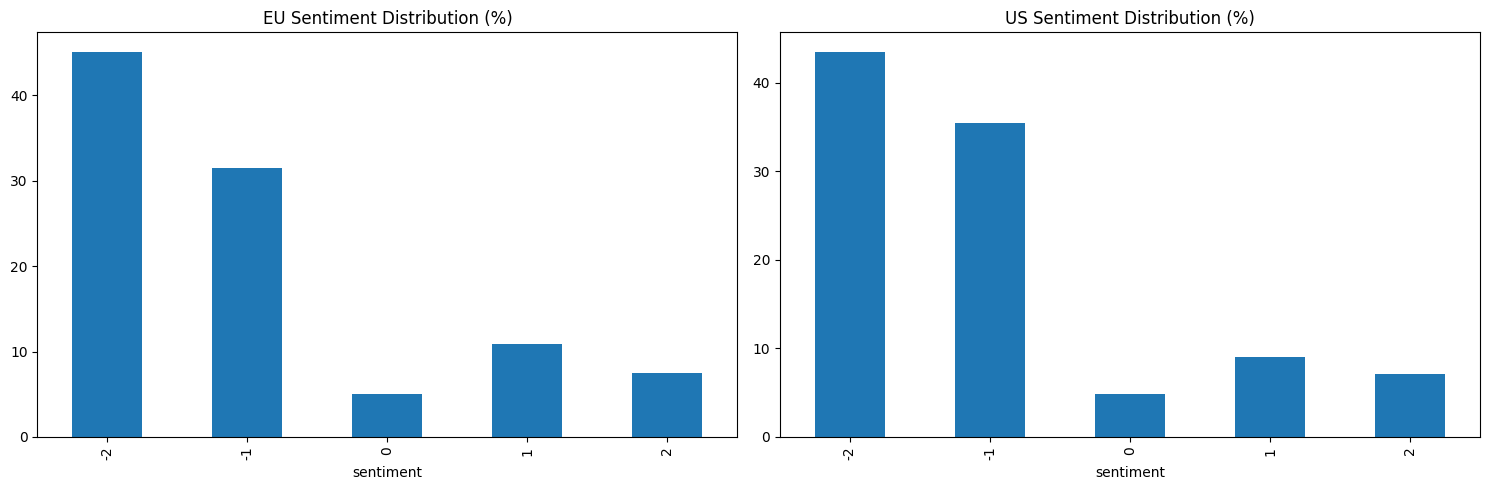

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

(data_EU['sentiment'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', ax=axes[0], title='EU Sentiment Distribution (%)')
(data_US['sentiment'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', ax=axes[1], title='US Sentiment Distribution (%)')

plt.tight_layout()
plt.show()

In [ ]:
print(f'In Europe are present {len(data_EU['ngo_name1'].unique())} unique NGOs. Targeted companies are {len(data_EU['company'].unique())}.')
print(f'In the US are present {len(data_US['ngo_name1'].unique())} unique NGOs. Targeted companies are {len(data_US['company'].unique())}.')

In Europe are present 1402 unique NGOs. Targeted companies are 3575.
In the US are present 1721 unique NGOs. Targeted companies are 4297.


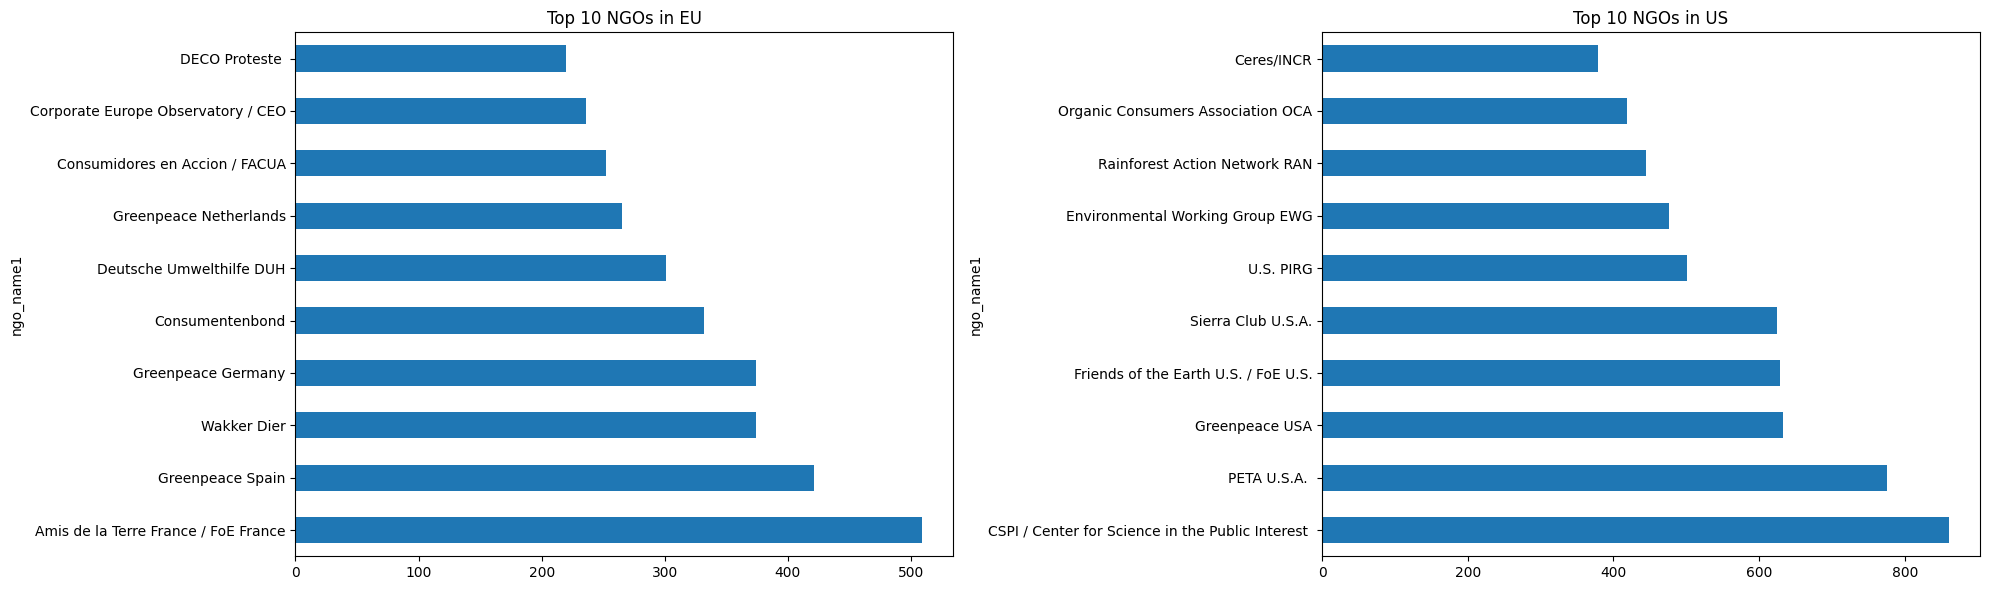

In [ ]:
# Top 10 NGOs in each region
top_10_ngo_eu = data_EU['ngo_name1'].value_counts().nlargest(10)
top_10_ngo_us = data_US['ngo_name1'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

top_10_ngo_eu.plot(kind='barh', ax=axes[0], title='Top 10 NGOs in EU')
top_10_ngo_us.plot(kind='barh', ax=axes[1], title='Top 10 NGOs in US')

plt.tight_layout()
plt.show()

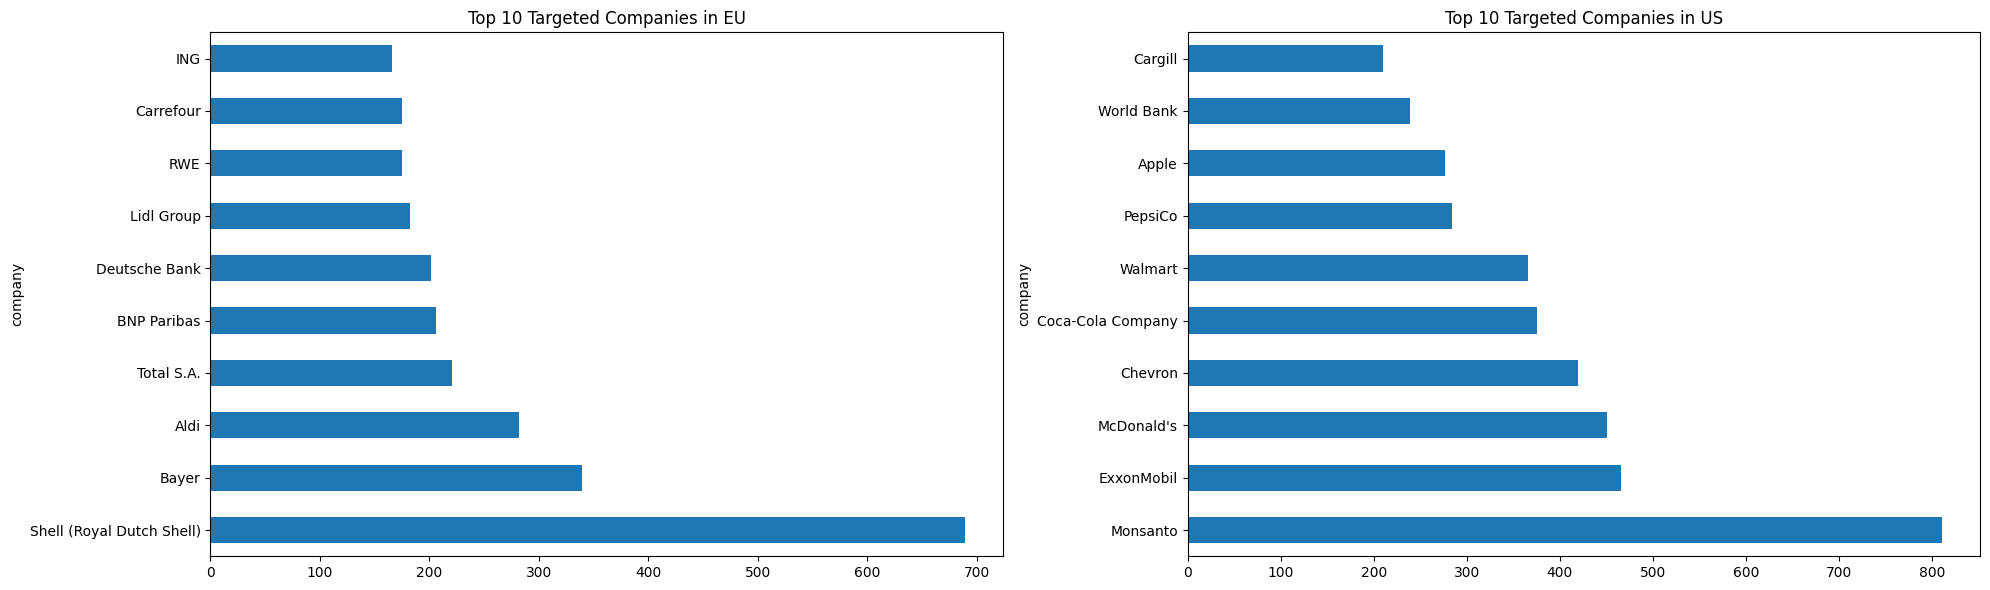

In [ ]:
# Top 10 targeted companies in each region
top_10_company_eu = data_EU['company'].value_counts().nlargest(10)
top_10_company_us = data_US['company'].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

top_10_company_eu.plot(kind='barh', ax=axes[0], title='Top 10 Targeted Companies in EU')
top_10_company_us.plot(kind='barh', ax=axes[1], title='Top 10 Targeted Companies in US')

plt.tight_layout()
plt.show()

In [ ]:
#top 10 positive per region

pos_counts_eu = (data_EU[data_EU['sentiment'].isin([1,2])].groupby('company', dropna = False).size()
    .sort_values(ascending=False)
    .rename("positive_count")
    .reset_index()
)


pos_counts_us = (data_US[data_US['sentiment'].isin([1,2])].groupby('company', dropna = False).size()
    .sort_values(ascending=False)
    .rename("positive_count")
    .reset_index())

#top 10 negative per region

neg_counts_eu = (data_EU[data_EU['sentiment'].isin([-1, -2])].groupby('company', dropna = False).size()
    .sort_values(ascending=False)
    .rename("negative_count")
    .reset_index())


neg_counts_us = (data_US[data_US['sentiment'].isin([-1, -2])].groupby('company', dropna = False).size()
    .sort_values(ascending=False)
    .rename("negative_count")
    .reset_index())

In [ ]:
neg_counts_eu

,company,negative_count
0,Shell (Royal Dutch Shell),648
1,Bayer,332
2,Total S.A.,195
3,Deutsche Bank,181
4,Aldi,174
...,...,...
2952,Just Naturstein,1
2953,Jupiler Belgian beer,1
2954,Junghans Microtec,1
2955,Jumbo (Greece),1


In [ ]:
neg_counts_us

,company,negative_count
0,Monsanto,806
1,ExxonMobil,445
2,Chevron,401
3,Coca-Cola Company,303
4,McDonald's,293
...,...,...
3637,Yukon-Nevada Gold,1
3638,Yucca Mountain,1
3639,Yucatan Guacamole,1
3640,Yucatan Foods,1


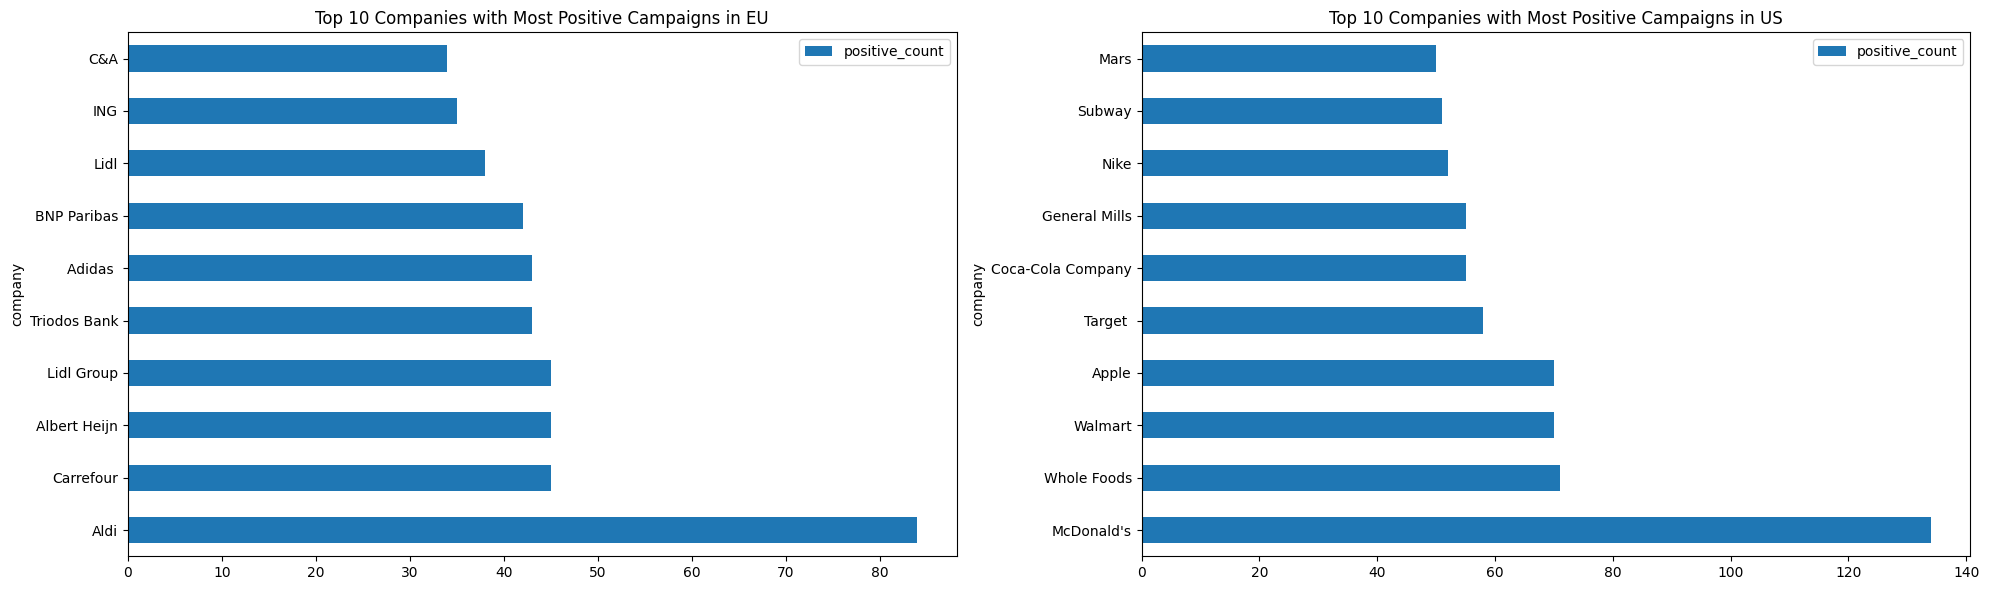

In [ ]:
# Plot top 10 positive companies
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

pos_counts_eu.head(10).plot(kind='barh', x='company', y='positive_count', ax=axes[0], title='Top 10 Companies with Most Positive Campaigns in EU')
pos_counts_us.head(10).plot(kind='barh', x='company', y='positive_count', ax=axes[1], title='Top 10 Companies with Most Positive Campaigns in US')

plt.tight_layout()
plt.show()

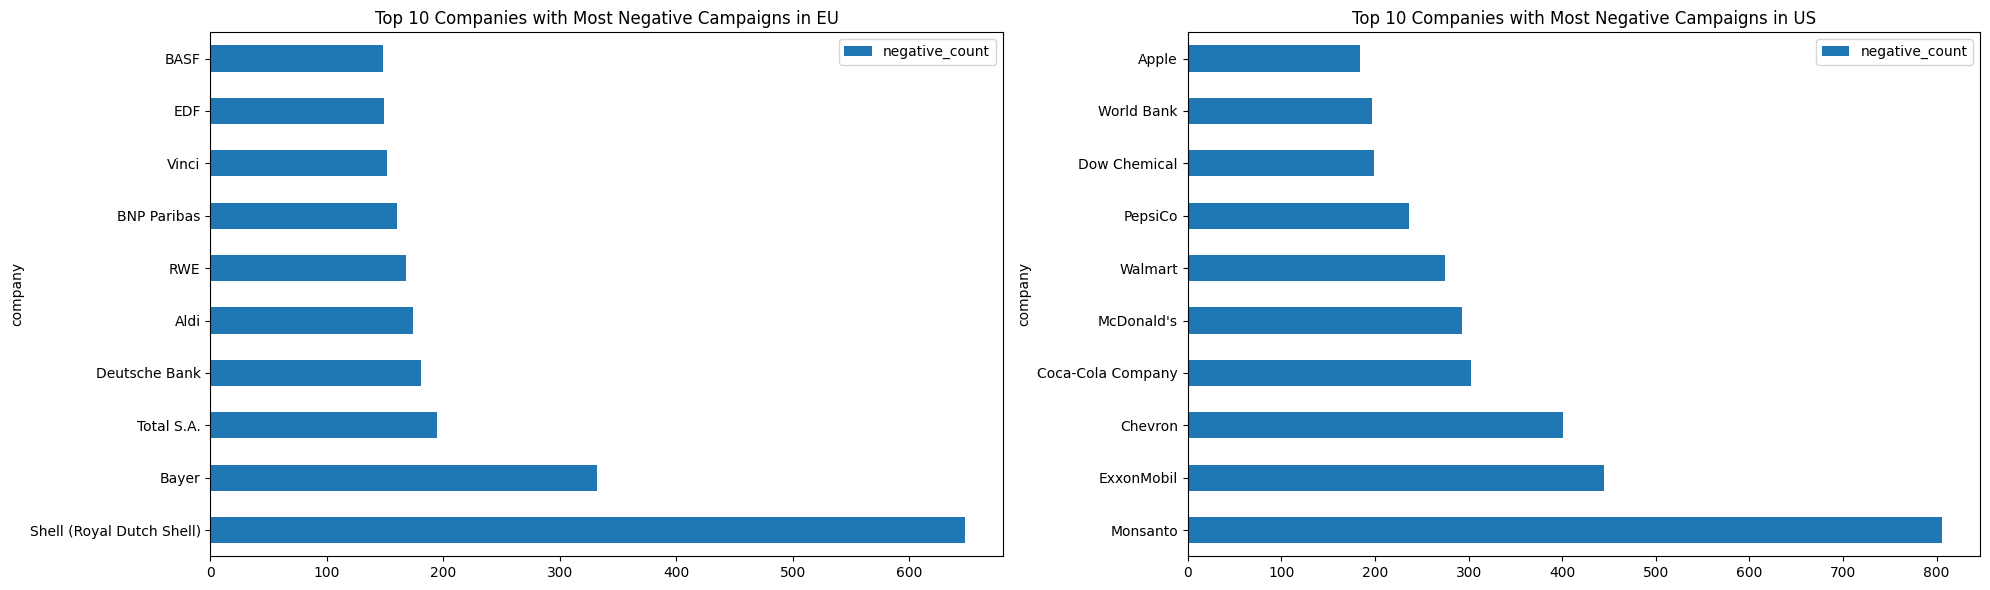

In [ ]:
# Plot top 10 negative companies
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

neg_counts_eu.head(10).plot(kind='barh', x='company', y='negative_count', ax=axes[0], title='Top 10 Companies with Most Negative Campaigns in EU')
neg_counts_us.head(10).plot(kind='barh', x='company', y='negative_count', ax=axes[1], title='Top 10 Companies with Most Negative Campaigns in US')

plt.tight_layout()
plt.show()

# **Task 4:** Fama-French 3 Factors Model

##**USA Analysis**

 ## **Data Preparation** -  we merge the North America 3 Daily Factors with the US banks daily stock returns

In [ ]:
banks_US = pd.read_excel("banks_ri.xlsm", sheet_name='US')
banks_US.head()
banks_US['Name']= pd.to_datetime(banks_US['Name'])
banks_US.rename(columns = {'Name':'date'}, inplace = True)
banks_US

,date,BANK OF AMERICA - TOT RETURN IND,TRUIST FINANCIAL - TOT RETURN IND,BOK FINL. - TOT RETURN IND,CIT GROUP - TOT RETURN IND,CITIZENS FINANCIAL GROUP - TOT RETURN IND,COMERICA - TOT RETURN IND,COMMERCE BCSH. - TOT RETURN IND,CREDICORP - TOT RETURN IND,CULLEN FO.BANKERS - TOT RETURN IND,...,AMERICAN INTL.GP. - TOT RETURN IND,ARES MANAGEMENT A - TOT RETURN IND,AXIS CAPITAL HDG. - TOT RETURN IND,BANK OF NEW YORK MELLON - TOT RETURN IND,BERKSHIRE HILLS BANCORP - TOT RETURN IND,CITIGROUP - TOT RETURN IND,GOLDMAN SACHS GP. - TOT RETURN IND,JP MORGAN CHASE & CO. - TOT RETURN IND,LEHMAN BROS.HDG.CAP.TST. III PF.SR.K - TOT RETURN IND,MASTERCARD - TOT RETURN IND
0,2008-01-01,3628.53,4617.89,2110.76,NaN,NaN,10265.34,1924.35,1029.56,3805.01,...,5675.92,NaN,165.55,14494.80,241.09,2683.92,325.90,3663.10,108.74,470.34
1,2008-01-02,3566.97,4449.25,2073.61,NaN,NaN,10081.39,1891.32,1014.31,3688.59,...,5481.20,NaN,165.34,14010.25,239.70,2636.52,314.61,3570.78,113.44,469.21
2,2008-01-03,3544.11,4384.51,2029.92,NaN,NaN,9763.03,1851.00,1023.08,3640.52,...,5495.81,NaN,163.34,14616.68,237.29,2637.43,310.43,3546.23,118.52,463.61
3,2008-01-04,3504.53,4119.51,2009.92,NaN,NaN,9414.02,1811.54,1005.81,3529.36,...,5383.85,NaN,165.68,14313.46,227.64,2574.53,302.99,3465.79,118.47,439.72
4,2008-01-07,3508.93,4181.25,2048.29,NaN,NaN,9562.58,1837.70,1014.85,3623.24,...,5481.20,NaN,165.93,14509.66,228.85,2576.35,295.11,3500.50,119.45,438.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2020-04-22,2329.69,7770.52,2451.29,67.07,96.58,9564.00,5664.03,2612.82,6435.24,...,150.66,226.96,206.42,13459.04,199.38,443.90,314.73,10222.55,0.36,5958.74
3212,2020-04-23,2337.17,7836.80,2513.79,65.72,99.88,9925.21,5740.51,2583.03,6587.11,...,153.36,238.23,200.07,13383.25,201.74,446.21,313.06,10228.28,0.36,5934.39
3213,2020-04-24,2370.30,8108.77,2556.38,66.84,101.61,10091.68,5710.54,2529.69,6829.66,...,158.03,246.50,200.71,13549.97,202.92,452.94,316.55,10379.32,0.31,6001.65
3214,2020-04-27,2508.16,8563.57,2690.23,70.30,110.64,10839.20,5943.10,2594.53,7262.32,...,163.65,255.94,205.89,14114.56,221.02,489.30,328.25,10826.71,0.31,6149.17


In [ ]:
#load 3 factors and RF
rf_US = pd.read_excel('North_America_3_Factors_Daily.xlsx')
rf_US['date'] = pd.to_datetime(rf_US['date'])
rf_US.head()

,date,Mkt-RF,SMB,HML,RF
0,1990-07-02,0.30,-0.38,-0.12,0.03
1,1990-07-03,0.14,-0.08,-0.40,0.03
2,1990-07-04,-0.01,-0.02,0.02,0.03
3,1990-07-05,-1.00,0.46,0.08,0.03
4,1990-07-06,0.56,-0.49,-0.34,0.03


In [ ]:
print(f'HML MEAN:{rf_US['HML'].mean()}')
print(f'SMB MEAN {rf_US['SMB'].mean()}')
print(f'MKT-RF MEAN {rf_US['Mkt-RF'].mean()}')
print(f'RF MEAN   {rf_US['RF'].mean()}')

HML MEAN:0.0029570505511212473
SMB MEAN -0.001462054985430128
MKT-RF MEAN 0.033167363486633725
RF MEAN   0.00972380590396554


This helped us understand that these variables are in %, therefore we need to divide by 100 each value.

In [ ]:
rf_US['HML'] = rf_US['HML']/100
rf_US['SMB'] = rf_US['SMB']/100
rf_US['Mkt-RF'] = rf_US['Mkt-RF']/100
rf_US['RF'] = rf_US['RF']/100
rf_US

,date,Mkt-RF,SMB,HML,RF
0,1990-07-02,0.0030,-0.0038,-0.0012,0.0003
1,1990-07-03,0.0014,-0.0008,-0.0040,0.0003
2,1990-07-04,-0.0001,-0.0002,0.0002,0.0003
3,1990-07-05,-0.0100,0.0046,0.0008,0.0003
4,1990-07-06,0.0056,-0.0049,-0.0034,0.0003
...,...,...,...,...,...
7888,2020-09-24,0.0023,-0.0036,0.0026,0.0000
7889,2020-09-25,0.0162,-0.0012,-0.0133,0.0000
7890,2020-09-28,0.0166,0.0040,0.0072,0.0000
7891,2020-09-29,-0.0042,0.0032,-0.0099,0.0000


In [ ]:
US_fin = banks_US.merge(rf_US, on = 'date')
US_fin.head()

,date,BANK OF AMERICA - TOT RETURN IND,TRUIST FINANCIAL - TOT RETURN IND,BOK FINL. - TOT RETURN IND,CIT GROUP - TOT RETURN IND,CITIZENS FINANCIAL GROUP - TOT RETURN IND,COMERICA - TOT RETURN IND,COMMERCE BCSH. - TOT RETURN IND,CREDICORP - TOT RETURN IND,CULLEN FO.BANKERS - TOT RETURN IND,...,BERKSHIRE HILLS BANCORP - TOT RETURN IND,CITIGROUP - TOT RETURN IND,GOLDMAN SACHS GP. - TOT RETURN IND,JP MORGAN CHASE & CO. - TOT RETURN IND,LEHMAN BROS.HDG.CAP.TST. III PF.SR.K - TOT RETURN IND,MASTERCARD - TOT RETURN IND,Mkt-RF,SMB,HML,RF
0,2008-01-01,3628.53,4617.89,2110.76,NaN,NaN,10265.34,1924.35,1029.56,3805.01,...,241.09,2683.92,325.90,3663.10,108.74,470.34,0.0004,0.0005,0.0001,0.0001
1,2008-01-02,3566.97,4449.25,2073.61,NaN,NaN,10081.39,1891.32,1014.31,3688.59,...,239.70,2636.52,314.61,3570.78,113.44,469.21,-0.0125,0.0009,-0.0022,0.0001
2,2008-01-03,3544.11,4384.51,2029.92,NaN,NaN,9763.03,1851.00,1023.08,3640.52,...,237.29,2637.43,310.43,3546.23,118.52,463.61,-0.0003,-0.0066,-0.0042,0.0001
3,2008-01-04,3504.53,4119.51,2009.92,NaN,NaN,9414.02,1811.54,1005.81,3529.36,...,227.64,2574.53,302.99,3465.79,118.47,439.72,-0.0259,-0.0045,0.0029,0.0001
4,2008-01-07,3508.93,4181.25,2048.29,NaN,NaN,9562.58,1837.70,1014.85,3623.24,...,228.85,2576.35,295.11,3500.50,119.45,438.24,0.0002,-0.0022,0.0024,0.0001


In [ ]:
# Identify columns with NaN values
cols_with_nan = US_fin.columns[US_fin.isnull().any()].tolist()

if cols_with_nan:
  print("Columns in US_fin with NaN values:")
  print(cols_with_nan)
else:
  print("There are no columns with NaN values in US_fin.")

Columns in US_fin with NaN values:
['CIT GROUP - TOT RETURN IND', 'CITIZENS FINANCIAL GROUP - TOT RETURN IND', 'FIRST REPUBLIC BANK - TOT RETURN IND', 'TRISTATE CAPITAL HOLDINGS DS - TOT RETURN IND', 'ALLY FINANCIAL - TOT RETURN IND', 'ARES MANAGEMENT A - TOT RETURN IND']


In [ ]:
# Remove columns with NaN values from US_fin
US_fin_cleaned = US_fin.dropna(axis=1)

# Print the number of columns before and after dropping NaNs to confirm
print(f"Number of columns before dropping NaNs: {US_fin.shape[1]}")
print(f"Number of columns after dropping NaNs: {US_fin_cleaned.shape[1]}")

# Display the first few rows of the cleaned DataFrame
display(US_fin_cleaned.head())

Number of columns before dropping NaNs: 64
Number of columns after dropping NaNs: 58


,date,BANK OF AMERICA - TOT RETURN IND,TRUIST FINANCIAL - TOT RETURN IND,BOK FINL. - TOT RETURN IND,COMERICA - TOT RETURN IND,COMMERCE BCSH. - TOT RETURN IND,CREDICORP - TOT RETURN IND,CULLEN FO.BANKERS - TOT RETURN IND,DISCOVER FINANCIAL SVS. - TOT RETURN IND,EAST WEST BANCORP - TOT RETURN IND,...,BERKSHIRE HILLS BANCORP - TOT RETURN IND,CITIGROUP - TOT RETURN IND,GOLDMAN SACHS GP. - TOT RETURN IND,JP MORGAN CHASE & CO. - TOT RETURN IND,LEHMAN BROS.HDG.CAP.TST. III PF.SR.K - TOT RETURN IND,MASTERCARD - TOT RETURN IND,Mkt-RF,SMB,HML,RF
0,2008-01-01,3628.53,4617.89,2110.76,10265.34,1924.35,1029.56,3805.01,52.81,538.97,...,241.09,2683.92,325.90,3663.10,108.74,470.34,0.0004,0.0005,0.0001,0.0001
1,2008-01-02,3566.97,4449.25,2073.61,10081.39,1891.32,1014.31,3688.59,52.18,519.84,...,239.70,2636.52,314.61,3570.78,113.44,469.21,-0.0125,0.0009,-0.0022,0.0001
2,2008-01-03,3544.11,4384.51,2029.92,9763.03,1851.00,1023.08,3640.52,51.93,511.83,...,237.29,2637.43,310.43,3546.23,118.52,463.61,-0.0003,-0.0066,-0.0042,0.0001
3,2008-01-04,3504.53,4119.51,2009.92,9414.02,1811.54,1005.81,3529.36,48.82,500.71,...,227.64,2574.53,302.99,3465.79,118.47,439.72,-0.0259,-0.0045,0.0029,0.0001
4,2008-01-07,3508.93,4181.25,2048.29,9562.58,1837.70,1014.85,3623.24,50.36,484.25,...,228.85,2576.35,295.11,3500.50,119.45,438.24,0.0002,-0.0022,0.0024,0.0001


In [ ]:
print(f'The cleaned dataframe contains {len(US_fin_cleaned.columns) - 5} banks.')

The cleaned dataframe contains 53 banks.


In [ ]:
#compute daily returns
def compute_daily_returns(df):
  for col in df.columns:
    if 'TOT RETURN IND' in col:
        df[col] = df[col].pct_change()  # or np.log(df[col]).diff()

# Drop the first NaN row
  df = df.dropna()

  return df


In [ ]:
# Compute daily returns using the cleaned US financial data
US_fin_returns = compute_daily_returns(US_fin_cleaned)
display(US_fin_returns)

/tmp/ipython-input-1247105652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].pct_change()  # or np.log(df[col]).diff()


,date,BANK OF AMERICA - TOT RETURN IND,TRUIST FINANCIAL - TOT RETURN IND,BOK FINL. - TOT RETURN IND,COMERICA - TOT RETURN IND,COMMERCE BCSH. - TOT RETURN IND,CREDICORP - TOT RETURN IND,CULLEN FO.BANKERS - TOT RETURN IND,DISCOVER FINANCIAL SVS. - TOT RETURN IND,EAST WEST BANCORP - TOT RETURN IND,...,BERKSHIRE HILLS BANCORP - TOT RETURN IND,CITIGROUP - TOT RETURN IND,GOLDMAN SACHS GP. - TOT RETURN IND,JP MORGAN CHASE & CO. - TOT RETURN IND,LEHMAN BROS.HDG.CAP.TST. III PF.SR.K - TOT RETURN IND,MASTERCARD - TOT RETURN IND,Mkt-RF,SMB,HML,RF
1,2008-01-02,-0.016966,-0.036519,-0.017600,-0.017920,-0.017164,-0.014812,-0.030597,-0.011930,-0.035494,...,-0.005765,-0.017661,-0.034643,-0.025203,0.043222,-0.002403,-0.0125,0.0009,-0.0022,0.0001
2,2008-01-03,-0.006409,-0.014551,-0.021070,-0.031579,-0.021318,0.008646,-0.013032,-0.004791,-0.015409,...,-0.010054,0.000345,-0.013286,-0.006875,0.044781,-0.011935,-0.0003,-0.0066,-0.0042,0.0001
3,2008-01-04,-0.011168,-0.060440,-0.009853,-0.035748,-0.021318,-0.016880,-0.030534,-0.059888,-0.021726,...,-0.040668,-0.023849,-0.023967,-0.022683,-0.000422,-0.051530,-0.0259,-0.0045,0.0029,0.0001
4,2008-01-07,0.001256,0.014987,0.019090,0.015781,0.014441,0.008988,0.026600,0.031544,-0.032873,...,0.005315,0.000707,-0.026007,0.010015,0.008272,-0.003366,0.0002,-0.0022,0.0024,0.0001
5,2008-01-08,-0.037345,-0.032050,-0.037470,-0.038964,-0.033847,0.005853,-0.031922,-0.054210,-0.037666,...,-0.024732,-0.039634,-0.026871,-0.039669,-0.004102,-0.012527,-0.0169,-0.0018,-0.0095,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2020-04-22,0.007394,-0.000882,0.031414,0.034658,-0.011365,0.002967,0.000680,0.024804,-0.013888,...,0.009315,0.016115,0.012482,0.003255,0.000000,0.047114,0.0227,-0.0045,-0.0110,0.0000
3212,2020-04-23,0.003211,0.008530,0.025497,0.037768,0.013503,-0.011401,0.023600,-0.009387,0.094521,...,0.011837,0.005204,-0.005306,0.000561,0.000000,-0.004086,0.0013,0.0103,0.0054,0.0000
3213,2020-04-24,0.014175,0.034704,0.016943,0.016772,-0.005221,-0.020650,0.036822,0.040474,0.028441,...,0.005849,0.015083,0.011148,0.014767,-0.138889,0.011334,0.0140,0.0035,-0.0033,0.0000
3214,2020-04-27,0.058161,0.056087,0.052359,0.074073,0.040725,0.025632,0.063350,0.033370,0.057625,...,0.089198,0.080276,0.036961,0.043104,0.000000,0.024580,0.0175,0.0190,0.0137,0.0000


In [ ]:
US_final = US_fin_returns

## Fama-French 3 Factors Model - Estimate parameters


In [ ]:
import warnings
import statsmodels.api as sm

#COnfiguration
WINDOW = 252  # ~1 year
FACTOR_COLS = ["Mkt-RF", "SMB", "HML", "RF"]
EPS = 1e-12

#Prepare data
df = US_final.copy()
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)


stock_cols = [c for c in df.columns if c not in FACTOR_COLS + ["date"]]

# Helper to assign significance stars
def sig_flag(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""



# Rolling FF3 estimation function

def rolling_ff3(df, stock_col, window=252):
    sub = df[["date", stock_col, "Mkt-RF", "SMB", "HML", "RF"]].dropna().copy()
    sub["excess_ret"] = sub[stock_col] - sub["RF"]
    results = []

    for i in range(window, len(sub)):
        win = sub.iloc[i-window:i]

        y = win["excess_ret"].values
        X = win[["Mkt-RF", "SMB", "HML"]].values

        # Skip degenerate windows (avoid R^2 divide-by-zero and unstable stats)
        if np.var(y) < EPS or np.any(np.var(X, axis=0) < EPS):
            continue

        X = sm.add_constant(X)

        # Silence runtime warnings from statsmodels/numpy for this fit
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            old = np.seterr(all="ignore")
            try:
                model = sm.OLS(y, X).fit()
            finally:
                np.seterr(**{k: 'warn' for k in old})

        params = model.params
        pvals  = model.pvalues

        results.append({
            "date": sub["date"].iloc[i],
            "bank": stock_col,
            "alpha": params[0],
            "beta_MKT": params[1],
            "beta_SMB": params[2],
            "beta_HML": params[3],
            "p_alpha": pvals[0],
            "p_MKT": pvals[1],
            "p_SMB": pvals[2],
            "p_HML": pvals[3],
            "sig_alpha": sig_flag(pvals[0]),
            "sig_MKT": sig_flag(pvals[1]),
            "sig_SMB": sig_flag(pvals[2]),
            "sig_HML": sig_flag(pvals[3]),
            "r2": model.rsquared
        })

    return pd.DataFrame(results)


#Estimate for all banks

all_results = []
for col in stock_cols:
    print(f"Estimating FF3 for {col} ...")
    res = rolling_ff3(df, col, WINDOW)
    all_results.append(res)

ff3_results = pd.concat(all_results, ignore_index=True)

# Example preview
ff3_results.head()

Estimating FF3 for BANK OF AMERICA - TOT RETURN IND ...
Estimating FF3 for TRUIST FINANCIAL - TOT RETURN IND ...
Estimating FF3 for BOK FINL. - TOT RETURN IND ...
Estimating FF3 for COMERICA - TOT RETURN IND ...
Estimating FF3 for COMMERCE BCSH. - TOT RETURN IND ...
Estimating FF3 for CREDICORP - TOT RETURN IND ...
Estimating FF3 for CULLEN FO.BANKERS - TOT RETURN IND ...
Estimating FF3 for DISCOVER FINANCIAL SVS. - TOT RETURN IND ...
Estimating FF3 for EAST WEST BANCORP - TOT RETURN IND ...
Estimating FF3 for FIFTH THIRD BANCORP - TOT RETURN IND ...
Estimating FF3 for FIRST CTZN.BCSH.A - TOT RETURN IND ...
Estimating FF3 for FIRST FINL.BKSH. - TOT RETURN IND ...
Estimating FF3 for FIRST HORIZON NATIONAL - TOT RETURN IND ...
Estimating FF3 for FNB - TOT RETURN IND ...
Estimating FF3 for HUNTINGTON BCSH. - TOT RETURN IND ...
Estimating FF3 for IBERIABANK - TOT RETURN IND ...
Estimating FF3 for KEYCORP - TOT RETURN IND ...
Estimating FF3 for M&T BANK - TOT RETURN IND ...
Estimating FF3 f

,date,bank,alpha,beta_MKT,beta_SMB,beta_HML,p_alpha,p_MKT,p_SMB,p_HML,sig_alpha,sig_MKT,sig_SMB,sig_HML,r2
0,2008-12-19,BANK OF AMERICA - TOT RETURN IND,-0.000159,1.372956,-0.129351,4.223070,0.922688,1.078148e-49,0.530516,6.818428e-52,,***,,***,0.831781
1,2008-12-22,BANK OF AMERICA - TOT RETURN IND,-0.000261,1.372330,-0.136276,4.225199,0.873213,1.201085e-49,0.508329,6.720753e-52,,***,,***,0.831610
2,2008-12-23,BANK OF AMERICA - TOT RETURN IND,-0.000191,1.369013,-0.135860,4.222340,0.907598,2.201727e-49,0.511062,1.112000e-51,,***,,***,0.830859
3,2008-12-24,BANK OF AMERICA - TOT RETURN IND,-0.000337,1.372106,-0.126951,4.224892,0.837743,3.440381e-49,0.540281,1.482281e-51,,***,,***,0.830784
4,2008-12-25,BANK OF AMERICA - TOT RETURN IND,-0.000095,1.374179,-0.125833,4.226581,0.954289,7.929541e-49,0.546861,4.307590e-51,,***,,***,0.828963


In [ ]:
ff3_results

,date,bank,alpha,beta_MKT,beta_SMB,beta_HML,p_alpha,p_MKT,p_SMB,p_HML,sig_alpha,sig_MKT,sig_SMB,sig_HML,r2
0,2008-12-19,BANK OF AMERICA - TOT RETURN IND,-0.000159,1.372956,-0.129351,4.223070,0.922688,1.078148e-49,0.530516,6.818428e-52,,***,,***,0.831781
1,2008-12-22,BANK OF AMERICA - TOT RETURN IND,-0.000261,1.372330,-0.136276,4.225199,0.873213,1.201085e-49,0.508329,6.720753e-52,,***,,***,0.831610
2,2008-12-23,BANK OF AMERICA - TOT RETURN IND,-0.000191,1.369013,-0.135860,4.222340,0.907598,2.201727e-49,0.511062,1.112000e-51,,***,,***,0.830859
3,2008-12-24,BANK OF AMERICA - TOT RETURN IND,-0.000337,1.372106,-0.126951,4.224892,0.837743,3.440381e-49,0.540281,1.482281e-51,,***,,***,0.830784
4,2008-12-25,BANK OF AMERICA - TOT RETURN IND,-0.000095,1.374179,-0.125833,4.226581,0.954289,7.929541e-49,0.546861,4.307590e-51,,***,,***,0.828963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152038,2020-04-22,MASTERCARD - TOT RETURN IND,0.000067,1.239961,-0.501427,-0.119275,0.934712,1.056986e-84,0.000053,2.624475e-01,,***,***,,0.789079
152039,2020-04-23,MASTERCARD - TOT RETURN IND,0.000074,1.244905,-0.508761,-0.129109,0.927515,3.066468e-85,0.000044,2.243466e-01,,***,***,,0.790719
152040,2020-04-24,MASTERCARD - TOT RETURN IND,0.000050,1.246035,-0.506871,-0.132661,0.950961,3.473650e-85,0.000044,2.129596e-01,,***,***,,0.790660
152041,2020-04-27,MASTERCARD - TOT RETURN IND,0.000024,1.245355,-0.508550,-0.131143,0.976579,3.305284e-85,0.000041,2.180147e-01,,***,***,,0.790688


## Plots and Results

### Observe the evolution of FF betas for a single bank

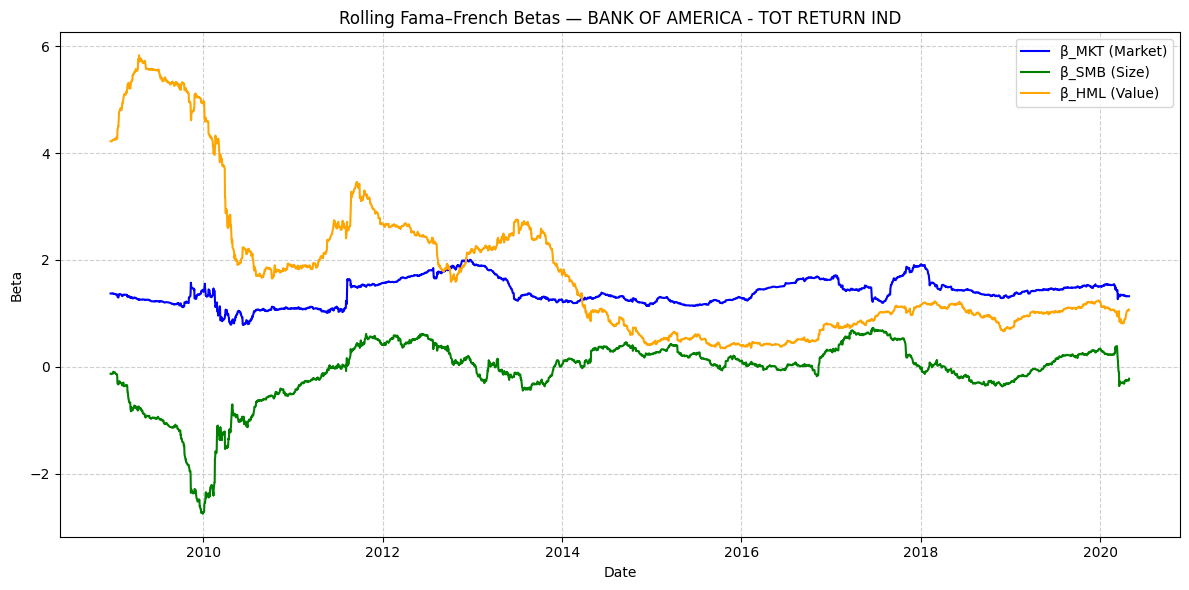

Change name of the bank if interested in observing another banks paramenters.


In [ ]:
import matplotlib.pyplot as plt

bank = "BANK OF AMERICA - TOT RETURN IND" #change bank of interest
sub = ff3_results[ff3_results["bank"] == bank]

plt.figure(figsize=(12,6))
plt.plot(sub["date"], sub["beta_MKT"], label="β_MKT (Market)", color="blue")
plt.plot(sub["date"], sub["beta_SMB"], label="β_SMB (Size)", color="green")
plt.plot(sub["date"], sub["beta_HML"], label="β_HML (Value)", color="orange")
plt.title(f"Rolling Fama–French Betas — {bank}")
plt.xlabel("Date"); plt.ylabel("Beta")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout(); plt.show()
print("Change name of the bank if interested in observing another banks paramenters.")

### Observe distribution of alphas (excess returns)

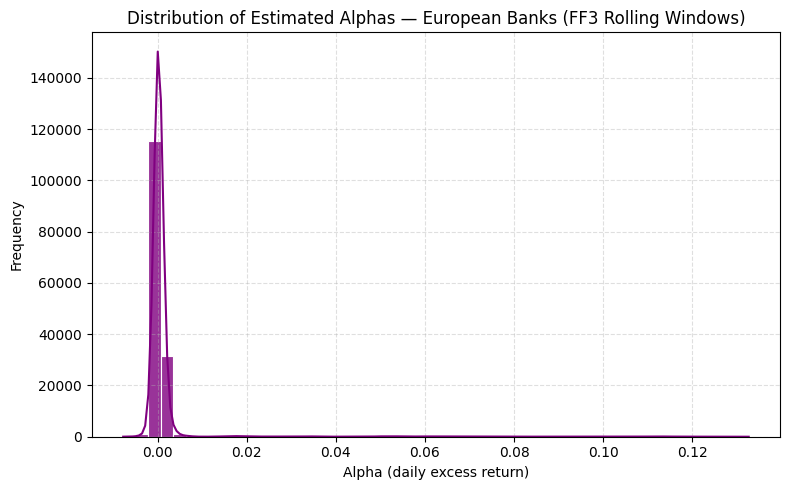

Summary statistics of alphas:
count   152043.000000
mean         0.001407
std          0.009303
min         -0.007714
25%         -0.000199
50%          0.000212
75%          0.000670
max          0.132631


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Collect all alphas from your FF3 rolling estimates
alphas_eu = ff3_results["alpha"].dropna()

#  Plot histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(alphas_eu, bins=50, kde=True, color="purple", edgecolor="white", alpha=0.8)

plt.title("Distribution of Estimated Alphas — European Banks (FF3 Rolling Windows)")
plt.xlabel("Alpha (daily excess return)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

#  Summary stats
print("Summary statistics of alphas:")
print(alphas_eu.describe().to_string(float_format=lambda x: f"{x:.6f}"))


### Distribution of Estimated Alphas — US Banks

The distribution of estimated alphas for US banks is tightly centered around zero, with a small right-hand tail.  
Most daily excess-return alphas cluster between very close to zero, and only a few outliers reach higher positive values.

**Interpretation:**
- The narrow, symmetric shape suggests that the **Fama–French 3-factor model captures US bank returns well**, leaving little systematic unexplained return.  
- The small right skew implies that some windows or institutions experienced slightly positive abnormal returns, but these do not seem to be widespread.  
- This result is consistent with prior findings that the FF3 model, originally calibrated on US data, provides a **good fit for domestic equities** (*Fama & French, 1993; Griffin, 2002*).


### US betas estimate trend overtime

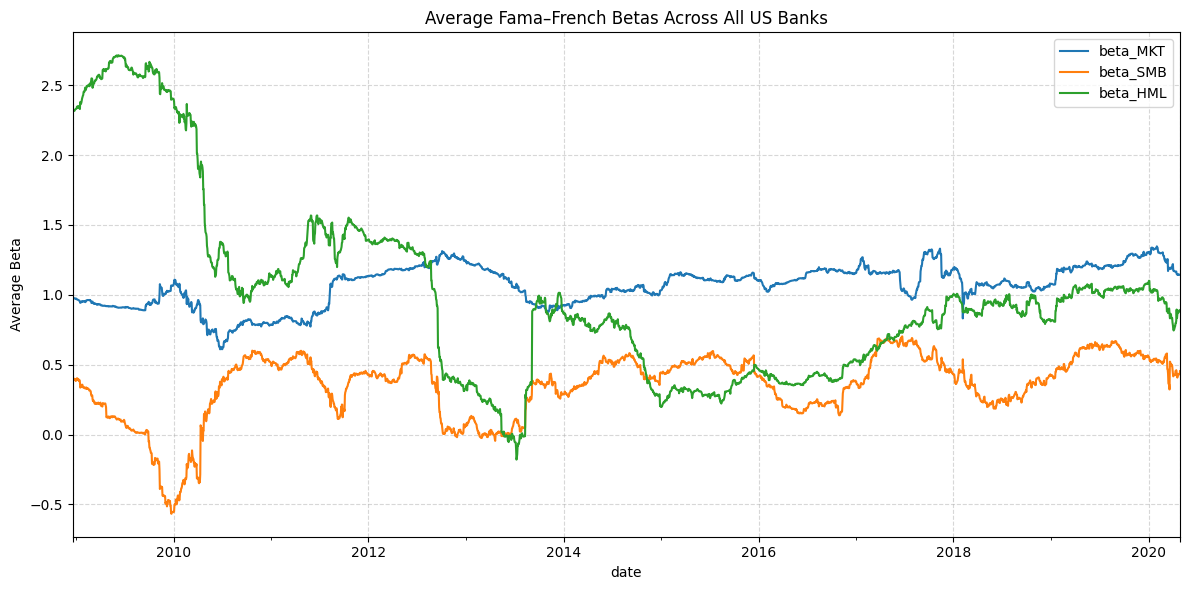

In [ ]:
mean_overall = ff3_results.groupby("date")[["beta_MKT","beta_SMB","beta_HML"]].mean()
mean_overall.plot(figsize=(12,6))
plt.title("Average Fama–French Betas Across All US Banks")
plt.ylabel("Average Beta")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Average Fama–French 3-Factor Betas: US Banks (2009–2020)

This figure displays the **average time-varying factor loadings (betas)** from the **Fama–French 3-factor model** across all US banks in the sample.  
The three factors represent exposure to:

- **Market risk (β<sub>MKT</sub>)** — sensitivity to broad market movements  
- **Size effect (β<sub>SMB</sub>)** — performance differential between small and large firms  
- **Value effect (β<sub>HML</sub>)** — performance differential between high and low book-to-market firms  

By tracking these betas through time, we can observe how US banks’ exposure to common risk factors evolved following the **2008 financial crisis** and during the subsequent decade of recovery.


### Interpretation of the US Fama–French Betas

The plot shows clear patterns consistent with the post-crisis dynamics in the US banking sector.

#### 🔹 Market Beta (β<sub>MKT</sub>)
- The market beta fluctuates around one throughout the sample, confirming that US bank returns move closely with the overall market.
- Temporary dips (2011–2013) may reflect **post-crisis deleveraging** and **regulatory adjustments** following Dodd–Frank and Basel III implementation.
- From 2015 onward, β<sub>MKT</sub> stabilizes near one again, indicating a return to normal market sensitivity.

**Interpretation:**  
A β<sub>MKT</sub> ≈ 1 highlights that US bank equities remain highly **systematically risky**, echoing findings from *Fama and French (1993, Journal of Financial Economics)* that market risk remains the dominant driver of returns.

---

#### 🔸 Size Beta (β<sub>SMB</sub>)
- The size loading remains modest (0–0.3) and turns **negative** briefly around 2009–2010.
- This period coincides with large banks’ relative outperformance — a likely result of the **“too-big-to-fail”** perception during the financial recovery.
- The small-cap effect in banking appears weak overall, consistent with the **concentrated and large-cap dominated structure** of the US banking industry.

**Interpretation:**  
This aligns with international evidence that the **SMB (size) premium is weaker in financial sectors** (see *Fama & French, 2012, Journal of Financial Economics*; *Rouwenhorst, 1999*), since most publicly listed banks are large institutions.

---

#### 🟢 Value Beta (β<sub>HML</sub>)

- Before the 2008–09 crisis, β<sub>HML</sub> was aaround 2–2.5, indicating that US banks behaved much like traditional value stocks—mature, dividend-paying, and sensitive to the business cycle.  
- During 2009, β<sub>HML</sub> **plummets sharply**, showing that the usual value–growth distinction temporarily broke down.  
  Bank returns became dominated by systemic risk, bail-out expectations, and monetary policy actions rather than book-to-market fundamentals.  
- In subsequent years, β<sub>HML</sub> gradually recovered to moderate levels (≈0.5–1.0 by 2015), reflecting the sector’s stabilization and a return to more normal pricing dynamics as profitability and confidence improved.

**Interpretation:**  
The collapse of β<sub>HML</sub> in 2009 reflects the US market’s rapid crisis and policy response: the value factor lost explanatory power when bank stocks moved almost one-for-one with overall market stress.  
As the system recovered, the value loading declined toward ordinary cyclical exposure, consistent with faster recapitalization and normalization of US financials.  
*Supported by Fama & French (2012, JFE); Acharya et al. (2018, RFS).*


---

## **EUROPE Analysis**

## **Data Preparation**

In [ ]:

#countries to analyse as considered in the EuroZone

print(data_EU['company_parent_country'].unique())

['Germany' 'Italy' 'Spain' 'France' 'Netherlands' 'Belgium' 'EU-Brussels'
 'Ireland' 'Austria' 'Portugal' 'Luxembourg' 'Slovakia' 'Greece'
 'Europe (incl. Brussels)' 'Monaco' 'Malta']


In [ ]:
file_path = 'banks_ri.xlsm'
for country in ['BD', 'IT', 'ES', 'FR', 'NL', 'BG', 'IR', 'OE', 'PT', 'SX', 'GR', 'MA']: #data on Monaco and Luxembourg absent in the banks dataset.
  banks = pd.read_excel(file_path, sheet_name=country)
  banks['Name']= pd.to_datetime(banks['Name'])
  banks.rename(columns = {'Name':'date'}, inplace = True)
  # Save the DataFrame with a country-specific name
  banks.to_csv(f'banks_{country}.csv', index=False)

In [ ]:
banks_BD = pd.read_csv('banks_BD.csv')
banks_BG = pd.read_csv('banks_BG.csv')
banks_ES = pd.read_csv('banks_ES.csv')
banks_FR = pd.read_csv('banks_FR.csv')
banks_GR = pd.read_csv('banks_GR.csv')
banks_IR = pd.read_csv('banks_IR.csv')
banks_IT = pd.read_csv('banks_IT.csv')
banks_MA = pd.read_csv('banks_MA.csv')
banks_NL = pd.read_csv('banks_NL.csv')
banks_OE = pd.read_csv('banks_OE.csv')
banks_PT = pd.read_csv('banks_PT.csv')
banks_SX = pd.read_csv('banks_SX.csv')


In [ ]:
# list of all your DataFrames
banks = [banks_BD, banks_BG, banks_ES, banks_FR, banks_GR,
       banks_IR, banks_IT, banks_MA, banks_NL, banks_OE,
       banks_PT, banks_SX]

# names (for convenience)
names = ['banks_BD', 'banks_BG', 'banks_ES', 'banks_FR', 'banks_GR',
         'banks_IR', 'banks_IT', 'banks_MA', 'banks_NL', 'banks_OE',
         'banks_PT', 'banks_SX']

# drop columns with NaN in any of them
for i, df in enumerate(banks):
    banks[i] = df.dropna(axis=1, how='any')
    print(f"{names[i]}: dropped columns with NaN")

# reassign to your variables if you want
banks_BD, banks_BG, banks_ES, banks_FR, banks_GR, \
banks_IR, banks_IT, banks_MA, banks_NL, banks_OE, \
banks_PT, banks_SX = banks


banks_BD: dropped columns with NaN
banks_BG: dropped columns with NaN
banks_ES: dropped columns with NaN
banks_FR: dropped columns with NaN
banks_GR: dropped columns with NaN
banks_IR: dropped columns with NaN
banks_IT: dropped columns with NaN
banks_MA: dropped columns with NaN
banks_NL: dropped columns with NaN
banks_OE: dropped columns with NaN
banks_PT: dropped columns with NaN
banks_SX: dropped columns with NaN


In [ ]:
# Map of suffix -> DataFrame
banks_dfs = {
    "BD": banks_BD,
    "BG": banks_BG,
    "ES": banks_ES,
    "FR": banks_FR,
    "GR": banks_GR,
    "IR": banks_IR,
    "IT": banks_IT,
    "MA": banks_MA,
    "NL": banks_NL,
    "OE": banks_OE,
    "PT": banks_PT,
    "SX": banks_SX,
}

# Apply your function to each df
returns_dfs = {k: compute_daily_returns(df) for k, df in banks_dfs.items()}

# Unpack into variables named returns_XX
returns_BD = returns_dfs["BD"]
returns_BG = returns_dfs["BG"]
returns_ES = returns_dfs["ES"]
returns_FR = returns_dfs["FR"]
returns_GR = returns_dfs["GR"]
returns_IR = returns_dfs["IR"]
returns_IT = returns_dfs["IT"]
returns_MA = returns_dfs["MA"]
returns_NL = returns_dfs["NL"]
returns_OE = returns_dfs["OE"]
returns_PT = returns_dfs["PT"]
returns_SX = returns_dfs["SX"]


/tmp/ipython-input-1247105652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].pct_change()  # or np.log(df[col]).diff()


In [ ]:
#import rff Europe
EU_rf = pd.read_excel('Europe_3_Factors_Daily.xlsx')
EU_rf['date'] = pd.to_datetime(EU_rf['date'])
EU_rf.head()

,date,Mkt-RF,SMB,HML,RF
0,1990-07-02,0.99,0.05,-0.53,0.03
1,1990-07-03,0.33,-0.12,-0.03,0.03
2,1990-07-04,0.24,-0.01,-0.14,0.03
3,1990-07-05,-0.64,0.19,0.06,0.03
4,1990-07-06,0.08,-0.19,0.14,0.03


In [ ]:
# collect your returns DataFrames
returns_dfs = {
    "BD": returns_BD,
    "BG": returns_BG,
    "ES": returns_ES,
    "FR": returns_FR,
    "GR": returns_GR,
    "IR": returns_IR,
    "IT": returns_IT,
    "MA": returns_MA,
    "NL": returns_NL,
    "OE": returns_OE,
    "PT": returns_PT,
    "SX": returns_SX,
}

merged_dfs = {}

for k, df in returns_dfs.items():
    # make sure each returns df has a datetime 'date' column
    tmp = df.copy()
    if 'date' not in tmp.columns:
        # if date is the index, move it to a column
        if isinstance(tmp.index, pd.DatetimeIndex):
            tmp = tmp.reset_index().rename(columns={'index': 'date'})
        else:
            raise ValueError(f"returns_{k} lacks a 'date' column and a DatetimeIndex.")
    tmp['date'] = pd.to_datetime(tmp['date'])

    # merge on date (inner join to keep common trading days)
    merged = pd.merge(tmp, EU_rf, on='date', how='inner')
    merged_dfs[k] = merged

# Optionally unpack into variables like merged_BD, merged_BG, ...
merged_BD = merged_dfs["BD"]
merged_BG = merged_dfs["BG"]
merged_ES = merged_dfs["ES"]
merged_FR = merged_dfs["FR"]
merged_GR = merged_dfs["GR"]
merged_IR = merged_dfs["IR"]
merged_IT = merged_dfs["IT"]
merged_MA = merged_dfs["MA"]
merged_NL = merged_dfs["NL"]
merged_OE = merged_dfs["OE"]
merged_PT = merged_dfs["PT"]
merged_SX = merged_dfs["SX"]

In [ ]:
merged_IT

,date,BANCA GENERALI - TOT RETURN IND,BANCA MONTE DEI PASCHI - TOT RETURN IND,BCA.PICCOLO CDT.VALTELL - TOT RETURN IND,BANCA PPO.DI SONDRIO - TOT RETURN IND,BANCO BPM - TOT RETURN IND,BNC.DI DESIO E DELB. - TOT RETURN IND,BPER BANCA - TOT RETURN IND,CREDITO EMILIANO - TOT RETURN IND,INTESA SANPAOLO - TOT RETURN IND,UNICREDIT - TOT RETURN IND,UNIONE DI BANCHE ITALIAN - TOT RETURN IND,MEDIOBANCA BC.FIN - TOT RETURN IND,Mkt-RF,SMB,HML,RF
0,2008-01-02,-0.014534,-0.011583,0.003906,0.004905,-0.008566,0.002825,0.000000,0.004761,-0.020332,-0.021127,-0.009027,-0.004957,-0.11,0.94,0.23,0.01
1,2008-01-03,-0.033974,-0.017809,-0.011066,0.000000,-0.021306,-0.005620,-0.007502,-0.034268,0.002830,0.006295,-0.016094,-0.007828,-0.13,-0.22,0.11,0.01
2,2008-01-04,-0.044984,-0.028022,-0.011190,-0.009762,-0.008154,-0.053670,-0.011330,-0.014721,-0.007524,-0.024129,-0.005432,-0.005023,-1.74,0.39,0.30,0.01
3,2008-01-07,-0.034399,-0.010741,-0.006211,-0.004929,-0.002715,0.017901,-0.012741,-0.006092,-0.001897,-0.001831,0.003786,-0.002163,-0.79,-1.03,0.16,0.01
4,2008-01-08,0.014043,0.005061,0.000000,-0.004936,-0.013084,-0.024189,-0.003230,-0.006129,-0.015195,-0.002753,-0.012551,-0.006503,0.71,-0.61,-0.56,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,2020-04-22,0.014877,0.000000,-0.023102,0.005709,0.000000,0.011535,-0.001410,0.006369,0.013785,0.019429,0.032212,-0.013103,1.29,-0.77,0.11,0.00
3211,2020-04-23,0.006822,0.000000,0.023649,0.029862,0.025362,0.041822,0.033663,0.020226,0.034524,0.027088,0.013931,0.063681,0.42,0.66,0.92,0.00
3212,2020-04-24,0.000000,0.000000,-0.026403,-0.015177,-0.035336,-0.051089,-0.041625,-0.006204,-0.029324,-0.030726,-0.025282,-0.024573,-0.33,0.40,-0.37,0.00
3213,2020-04-27,0.077607,0.000000,0.013559,0.003488,0.032967,0.000000,0.028280,-0.002511,0.038250,0.042021,0.027629,0.048382,1.89,-0.58,0.44,0.00


## Fama-French 3 Factors Model - Estimate parameters


In [ ]:
# same code as before but we run the model for each country

# Config

WINDOW = 252                     # ≈ 1Y daily
FACTOR_COLS = ["Mkt-RF", "SMB", "HML", "RF"]
EU_DF_NAMES = [
    "merged_BD","merged_BG","merged_ES","merged_FR","merged_GR",
    "merged_IR","merged_IT","merged_MA","merged_NL","merged_OE",
    "merged_PT","merged_SX"
]
EPS = 1e-12 # variance floor to skip bad windows


# Helpers

def sig_flag(p):
    return "***" if p < 0.01 else ("**" if p < 0.05 else ("*" if p < 0.10 else ""))

def prepare_country_df(df):
    """Ensure datetime, sort, and scale factors to decimals if they look like percent."""
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date").reset_index(drop=True)
    # If factors look like percent (e.g., 0.71 meaning 0.71%), divide by 100 once.
    if "Mkt-RF" in df.columns and df["Mkt-RF"].dropna().abs().median() > 0.2:
        df[FACTOR_COLS] = df[FACTOR_COLS] / 100.0
    return df

def rolling_ff3_one_stock(df, stock_col, window=252):
    """Rolling FF3 for a single stock; robust to degenerate windows; quiet warnings."""
    sub = df[["date", stock_col, "Mkt-RF", "SMB", "HML", "RF"]].dropna().copy()
    if sub.empty:
        return pd.DataFrame()
    sub["excess_ret"] = sub[stock_col] - sub["RF"]
    rows = []

    for i in range(window, len(sub)):
        win = sub.iloc[i-window:i]
        y = win["excess_ret"].values
        X = win[["Mkt-RF", "SMB", "HML"]].values

        # Skip windows with (near) zero variance to avoid divide-by-zero warnings
        if np.var(y) < EPS or np.any(np.var(X, axis=0) < EPS):
            continue

        X = sm.add_constant(X)

        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            old = np.seterr(all="ignore")
            try:
                m = sm.OLS(y, X).fit()
            finally:
                np.seterr(**{k: 'warn' for k in old})

        params, pvals = m.params, m.pvalues
        rows.append({
            "date": sub["date"].iloc[i],
            "bank": stock_col,
            "alpha": params[0],
            "beta_MKT": params[1],
            "beta_SMB": params[2],
            "beta_HML": params[3],
            "p_alpha": pvals[0],
            "p_MKT": pvals[1],
            "p_SMB": pvals[2],
            "p_HML": pvals[3],
            "sig_alpha": sig_flag(pvals[0]),
            "sig_MKT": sig_flag(pvals[1]),
            "sig_SMB": sig_flag(pvals[2]),
            "sig_HML": sig_flag(pvals[3]),
            "r2": m.rsquared
        })

    return pd.DataFrame(rows)

def rolling_ff3_country(df, country_code, window=252):
    df = prepare_country_df(df)
    stock_cols = [c for c in df.columns if c not in (FACTOR_COLS + ["date"])]
    all_rows = []
    for col in stock_cols:
        res = rolling_ff3_one_stock(df, col, window)
        if not res.empty:
            res["country"] = country_code
            all_rows.append(res)
    return pd.concat(all_rows, ignore_index=True) if all_rows else pd.DataFrame()


# Run FF3 across all EU country dataframes

eu_results = []
for name in EU_DF_NAMES:
    if name in globals():
        country_code = name.split("_", 1)[1]
        print(f"Estimating FF3 (rolling) for country {country_code} ...")
        eu_results.append(rolling_ff3_country(globals()[name], country_code, WINDOW))
    else:
        print(f"Warning: dataframe {name} not found; skipping.")

ff3_eu_results = pd.concat(eu_results, ignore_index=True) if eu_results else pd.DataFrame()
print("EU FF3 results shape:", ff3_eu_results.shape)


Estimating FF3 (rolling) for country BD ...
Estimating FF3 (rolling) for country BG ...
Estimating FF3 (rolling) for country ES ...
Estimating FF3 (rolling) for country FR ...
Estimating FF3 (rolling) for country GR ...
Estimating FF3 (rolling) for country IR ...
Estimating FF3 (rolling) for country IT ...
Estimating FF3 (rolling) for country MA ...
Estimating FF3 (rolling) for country NL ...
Estimating FF3 (rolling) for country OE ...
Estimating FF3 (rolling) for country PT ...
Estimating FF3 (rolling) for country SX ...
EU FF3 results shape: (189402, 16)


In [ ]:

# Country-level average betas over time

country_daily_avg = (
    ff3_eu_results
    .groupby(["country","date"])[["beta_MKT","beta_SMB","beta_HML","alpha","r2"]]
    .mean()
    .reset_index()
    .sort_values(["date","country"])
)

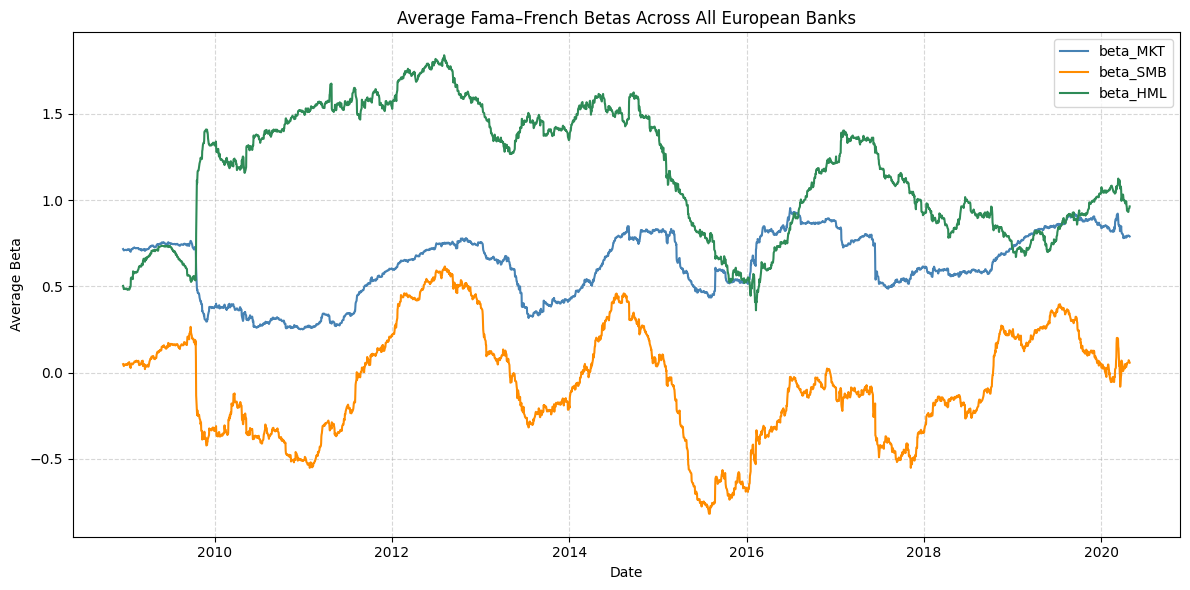

In [ ]:
import matplotlib.pyplot as plt

#  Compute daily average betas across all EU banks
eu_daily_avg = (
    ff3_eu_results
    .groupby("date")[["beta_MKT","beta_SMB","beta_HML"]]
    .mean()
    .reset_index()
    .sort_values("date")
)

#  Plot
plt.figure(figsize=(12,6))
plt.plot(eu_daily_avg["date"], eu_daily_avg["beta_MKT"], label="beta_MKT", color="steelblue")
plt.plot(eu_daily_avg["date"], eu_daily_avg["beta_SMB"], label="beta_SMB", color="darkorange")
plt.plot(eu_daily_avg["date"], eu_daily_avg["beta_HML"], label="beta_HML", color="seagreen")
plt.title("Average Fama–French Betas Across All European Banks")
plt.xlabel("Date")
plt.ylabel("Average Beta")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Average Fama–French 3-Factor Betas: European Banks (2009–2020)



#### 🔹 Market Beta (β<sub>MKT</sub>)

- The market beta remains **consistently below one**, averaging roughly 0.6–0.8 across most of the sample.  
- This suggests that European banks are **less sensitive to overall market movements** than their US counterparts.  
- The relatively low market exposure may reflect **stronger regulatory capital requirements**, **slower balance-sheet expansion**, and the **fragmented nature of European equity markets**.  
- Periodic spikes (2012, 2016) correspond with market stress during the Eurozone crisis and Brexit referendum, when co-movement with the broader market temporarily intensified.

**Interpretation:**  
European bank stocks display **lower systematic risk exposure**, consistent with *Fama & French (2012, Journal of Financial Economics)* and *Rouwenhorst (1999, Journal of Finance)*, who find that non-US markets generally exhibit smaller factor loadings due to market segmentation and institutional differences.

#### 🔸 Size Beta (β<sub>SMB</sub>)

- The SMB beta is frequently **negative** from 2010 to 2014, meaning **large banks outperformed small banks**.  
- This likely reflects post-crisis investor preference for stability and the dominant role of large, systemically important financial institutions in Europe.  
- Even when the SMB beta turns positive in later years (2016–2019), it remains small, indicating that **size effects contribute little to return variation** among European banks.

**Interpretation:**  
The weak and often negative SMB loading suggests that **size is not a priced risk factor** in the European banking sector.  
This result aligns with *Fama & French (2012)*, who report that the size premium is weaker in Europe than in the US, especially for financials.

#### 🟢 Value Beta (β<sub>HML</sub>)

- Around 2009, β<sub>HML</sub> for European banks rises sharply from roughly 0.5 to above 1.5, the mirror image of the steep decline observed in the US over the same period. However the value of the us and EU now are much closer.
- This surge indicates that, while US banks temporarily **lost their value-style behavior** as the financial crisis turned into a systemic panic, European banks were increasingly **priced like value stocks**—cheap, cyclical, and sensitive to macroeconomic recovery prospects.  
- The high β<sub>HML</sub> persists through 2011–2013, coinciding with the **Eurozone sovereign debt crisis**, when European financials remained deeply undervalued and heavily tied to economic fundamentals.  
- Only after 2015 does β<sub>HML</sub> gradually decline toward 0.8–1.0, reflecting slow normalization as the European banking sector stabilized.

**Interpretation:**  
The **sharp increase in β<sub>HML</sub>** among European banks contrasts directly with the **collapse in the US**, highlighting the divergent nature of the crises.  
In the US, the 2008–09 meltdown erased distinctions between value and growth as all banks moved with systemic risk.  
In Europe, by contrast, the crisis *created* a deep-value environment—banks remained persistently cheap, and their returns moved closely with the global value factor.  
This sustained value-style exposure reflects Europe’s **slower recapitalization, prolonged sovereign risk**, and **structural profitability challenges** (Fama & French, 2017; Acharya et al., 2018; ECB Financial Integration Reports, 2011–2015).


## Comparison of delta Beta over time EU v US

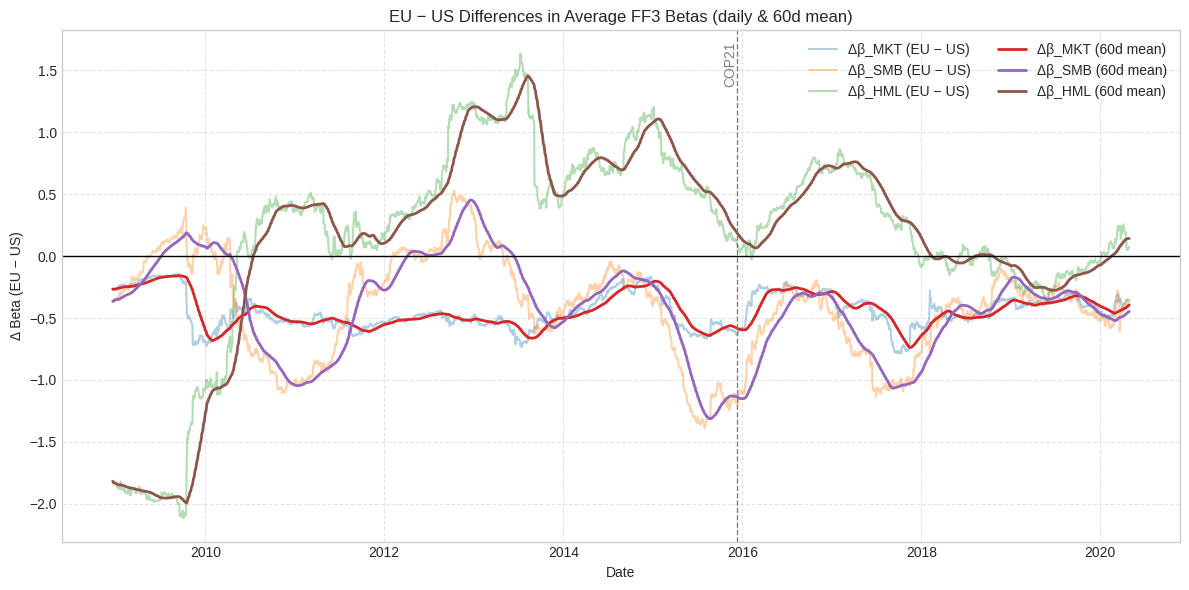

In [ ]:


# 1) Daily averages per region
eu_daily = (
    ff3_eu_results.groupby("date")[["beta_MKT","beta_SMB","beta_HML"]]
    .mean().reset_index().sort_values("date")
)
us_daily = (
    ff3_results.groupby("date")[["beta_MKT","beta_SMB","beta_HML"]]
    .mean().reset_index().sort_values("date")
)

# 2) Align on common dates and compute differences (EU - US)
merged = (
    eu_daily.merge(us_daily, on="date", suffixes=("_EU","_US"))
    .sort_values("date")
)
for fac in ["MKT","SMB","HML"]:
    merged[f"diff_{fac}"] = merged[f"beta_{fac}_EU"] - merged[f"beta_{fac}_US"]

# 3) smoothing (rolling mean)
win = 60  # trading days
for fac in ["MKT","SMB","HML"]:
    merged[f"diff_{fac}_roll"] = merged[f"diff_{fac}"].rolling(win, min_periods=1).mean()

# 4) Plot: differences on one chart
plt.figure(figsize=(12,6))
plt.plot(merged["date"], merged["diff_MKT"], alpha=0.35, label="Δβ_MKT (EU − US)")
plt.plot(merged["date"], merged["diff_SMB"], alpha=0.35, label="Δβ_SMB (EU − US)")
plt.plot(merged["date"], merged["diff_HML"], alpha=0.35, label="Δβ_HML (EU − US)")

# Smoothed overlays
plt.plot(merged["date"], merged["diff_MKT_roll"], linewidth=2, label="Δβ_MKT (60d mean)")
plt.plot(merged["date"], merged["diff_SMB_roll"], linewidth=2, label="Δβ_SMB (60d mean)")
plt.plot(merged["date"], merged["diff_HML_roll"], linewidth=2, label="Δβ_HML (60d mean)")

# Reference lines & annotation
plt.axhline(0, color="black", linewidth=1)
cop21 = pd.Timestamp("2015-12-12")
plt.axvline(cop21, color="gray", linestyle="--", linewidth=1)
plt.text(cop21, plt.ylim()[1]*0.95, "COP21", rotation=90, va="top", ha="right", color="gray")

plt.title("EU − US Differences in Average FF3 Betas (daily & 60d mean)")
plt.xlabel("Date")
plt.ylabel("Δ Beta (EU − US)")
plt.legend(ncol=2, frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### More recent times


### 🇪🇺 – 🇺🇸 Differences in Average Fama–French Betas

This figure shows the difference in average Fama–French betas between European and U.S. banks (Δβ = β<sub>EU</sub> – β<sub>US</sub>).  
Positive values indicate higher exposure in Europe, while negative values indicate higher exposure in the U.S.

#### 🧩 Key patterns

- **2009–2012: Sharp divergence.**  
  During and immediately after the global financial crisis, Δβ<sub>HML</sub> (green) rises steeply above zero — confirming that European banks became far more value-oriented than their U.S. counterparts.  
  In the same period, Δβ<sub>MKT</sub> and Δβ<sub>SMB</sub> turn negative, meaning U.S. banks were more exposed to overall market and size effects.

- **2013–2016: Persistent gap.**  
  The elevated Δβ<sub>HML</sub> aligns with the Eurozone debt crisis, when European financials remained undervalued and cyclical, while U.S. banks had already normalized under QE-driven recovery.

- **2017–2020: Gradual convergence.**  
  From roughly 2017 onward, all three beta differences move closer to zero, suggesting a slow **re-synchronization of transatlantic banking risk profiles.**  
  As global regulation tightened, profitability improved modestly, and macro conditions stabilized, European and U.S. banks began responding more similarly to common risk factors.

#### 🧠 Interpretation

The early divergence reflects how the **U.S. crisis was fast and systemic**, while the **European one was delayed and structural**.  
Over time, as policy frameworks, monetary conditions, and investor sentiment converged, the factor sensitivities of U.S. and European banks became more alike.

**By 2020**, Δβ values hover near zero — indicating that the regional distinctions in market, size, and value exposures that characterized the post-crisis decade have largely faded.


## Discussion: Structural Drivers of US–EU Differences in Bank Betas

The contrasts in factor loadings between US and European banks can possibly be explained through three structural dimensions of their financial systems:

### 1️⃣ Market Integration and Fragmentation
European equity markets remain **fragmented across national exchanges and clearing systems**, with differing regulations and limited cross-border liquidity.  
By contrast, the **US capital market is unified**, operating under a single regulator (SEC), one currency, and a centralized trading infrastructure.  
This fragmentation reduces the extent to which European stock returns co-move with a single aggregate market factor, which helps explain their **lower market betas (β<sub>MKT</sub>)**.  
*Supported by ESMA (Market Structure Report, 2025); Pagano et al. (2002, Economic Policy).*

---

### 2️⃣ Banking-System Heterogeneity
Europe’s banking landscape is **diverse and institutionally complex**, combining publicly traded “national champions” with many cooperative and partly state-owned institutions.  
In the **US**, nearly all large commercial banks are **publicly listed and shareholder-driven**, resulting in a more homogeneous, market-oriented sector.  
Because many small or regional European banks are not listed, the observed sample consists mainly of **large, stable institutions**, which contributes to **weak or negative size effects (β<sub>SMB</sub>)**.  
*Supported by Hardie & Howarth (2009, JCMS); ECB Financial Integration Reports.*

---

### 3️⃣ Regulation and Macroeconomic Recovery
After the global financial crisis, European regulators implemented **stricter capital and liquidity requirements** under Basel III and national frameworks, while the **US banking system recapitalized and recovered more quickly**.  
The Eurozone sovereign debt crisis and prolonged low interest rate environment further delayed European banks’ return to pre-crisis profitability.  
These conditions likely contributed to the **more persistent value-style exposure (high β<sub>HML</sub>)** observed in Europe relative to the US.  
*Supported by IMF (2018, Global Financial Stability Report); Fama & French (2017, JFE).*




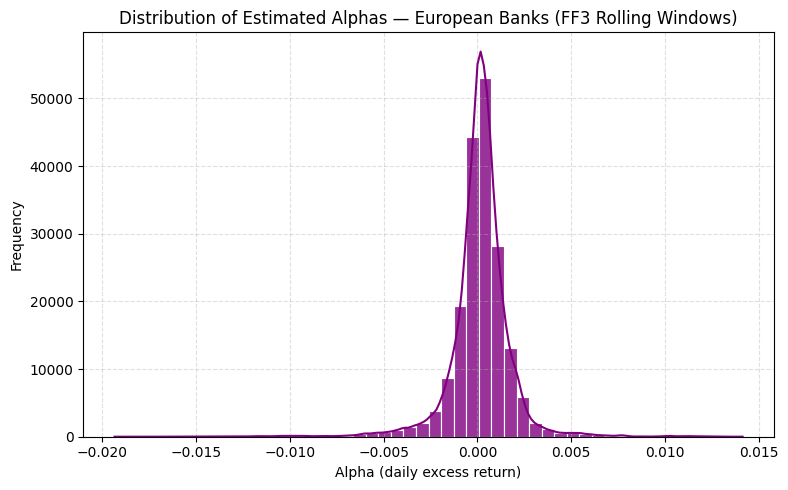

Summary statistics of alphas:
count   189402.000000
mean         0.000154
std          0.001682
min         -0.019353
25%         -0.000433
50%          0.000204
75%          0.000843
max          0.014143


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Collect all alphas from your FF3 rolling estimates
alphas_eu = ff3_eu_results["alpha"].dropna()

#  Plot histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(alphas_eu, bins=50, kde=True, color="purple", edgecolor="white", alpha=0.8)


plt.title("Distribution of Estimated Alphas — European Banks (FF3 Rolling Windows)")
plt.xlabel("Alpha (daily excess return)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# Summary stats
print("Summary statistics of alphas:")
print(alphas_eu.describe().to_string(float_format=lambda x: f"{x:.6f}"))


### Synthesis: Comparing Alpha Behavior between US and EU

Overall, the descriptive plots and summary statistics tell a consistent story with added nuance:

- **Model fit:** Both the US and EU alpha distributions are centered close to zero, indicating no major systematic bias in the Fama–French model.  
- **Residual volatility:** The US shows much larger standard deviation and extreme outliers, meaning that the model occasionally misses large episodic excess returns (e.g., QE periods, crisis recoveries).  
- **Typical variability:** The European alpha distribution is tighter overall but has a slightly wider interquartile range, suggesting low but consistent daily noise.  
- **Interpretation:**  
  - The **US model fit is strong on average but exhibits tail risk**, reflecting higher market dynamism.  
  - The **EU model fit is stable and conservative**, consistent with lower volatility and slower post-crisis recovery.

Hence, the additional statistics refine rather than overturn earlier conclusions:  
the Fama–French model remains broadly valid in both markets but behaves differently due to **distinct volatility regimes and structural characteristics**.


### Linking Alpha Behavior to Structural Differences

The observed differences in alpha distributions are consistent with known structural contrasts between US and European financial systems:

1. **Market Integration:**  
   The US’s unified and highly liquid capital market generates faster, larger price adjustments, leading to fatter alpha tails.  
   In Europe, fragmented exchanges and lower cross-border liquidity dampen volatility, resulting in narrower distributions.

2. **Regulation and Recovery:**  
   Post-crisis regulatory tightening and slower economic recovery in Europe constrained bank profitability, keeping mean alphas near zero.  
   US banks, benefiting from earlier recapitalization and quantitative easing, occasionally achieved large positive residuals.

3. **Banking-System Composition:**  
   Europe’s banking sector, shaped by cooperative and state-influenced institutions, exhibits more stable but less market-sensitive return patterns.  
   US banks’ shareholder-driven orientation produces greater alpha variability.

**Overall**, these structural differences help explain why **US banks show higher mean and more dispersed alphas**, while **European banks display lower, more stable unexplained returns**.  
The result reinforces that the **Fama–French 3-factor model behaves differently across institutional environments**—capturing systematic risk similarly, but leaving distinct residual patterns shaped by market structure and regulation.


## **TASK 5**: Compute CARs and merge Sigwatch + Datastream data


Try 3 time periods: 5, 10, 15 days.

# EUROPE

## Prepare data

In [ ]:
data_EU = pd.read_csv('data_EU.csv')

/tmp/ipython-input-196217187.py:1: DtypeWarning: Columns (17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_EU = pd.read_csv('data_EU.csv')


In [ ]:
data_EU['corp_industry_sector1'].unique()

array(['Fashion', 'Automotive', 'Biofuels', 'Professional services',
       'Energy', 'Nuclear', 'Finance', 'Gas', 'Aviation', 'Chemicals',
       'Retail', 'Pharmaceuticals', 'Alcoholic beverages',
       'Food & Non-alcoholic Beverages', 'Transport', 'Oil',
       'Healthcare & Pharma', 'Agriculture', 'Media', 'Metals',
       'Oil & Gas', 'Coal', 'Cosmetics & Beauty', 'Renewable energy',
       'Power generation', 'Construction & Development', 'Pesticides',
       'Electronics, Telecoms & Digital', 'Education', 'Biotechnology',
       'Mining & Metals', 'Water Industry', 'Marketing',
       'Tourism & Sports', 'Waste Handling', 'Paper',
       'Hydro and large dams', 'Bottled water', 'Marine transport',
       'Road haulage', 'Packaging', 'Textiles',
       'Personal Care & Toiletries',
       'Homecare (eg. detergents, cleaning products)',
       'Arms & Security Sector', "Toys & children's products",
       'Fisheries', 'Forestry & Paper', 'Plastics', 'Household hardware',
       

In [ ]:
import pandas as pd

file_path = "banks_info.xlsx"

# Load all sheet names
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Skip the first two sheets
sheets_to_load = sheet_names[2:]

# Read and concatenate all remaining sheets
all_sheets = []
for sheet in sheets_to_load:
    df = pd.read_excel(file_path, sheet_name=sheet)
    df["source_sheet"] = sheet  # Optional: keep track of origin
    all_sheets.append(df)

# Concatenate into one DataFrame
banks_info = pd.concat(all_sheets, ignore_index=True)

# Display result
print(f"Loaded {len(sheets_to_load)} sheets and {banks_info.shape[0]} total rows")
banks_info


Loaded 22 sheets and 187 total rows


,NaN,NAME,MNEMONIC,TRBC ECON SEC NAME,ISIN CODE,ISIN NUMBER,ISIN ISSUER CTRY,source_sheet
0,15437R,AAREAL BANK,D:ARL,Financials,DE0005408116,DE0005408116,DE,LBANKSBD
1,295348,COMDIRECT BANK,D:COM,Financials,DE0005428007,DE0005428007,DE,LBANKSBD
2,902189,COMMERZBANK,D:CBK,Financials,DE000CBK1001,DE000CBK1001,DE,LBANKSBD
3,9819LE,DT.PFANDBRIEFBANK,D:PBB,Financials,DE0008019001,DE0008019001,DE,LBANKSBD
4,2832ZV,PROCREDIT HOLDING,D:PCZ,Financials,DE0006223407,DE0006223407,DE,LBANKSBD
...,...,...,...,...,...,...,...,...
182,NaN,SPAREBANK 1 SR-BANK,NaN,NaN,NaN,NaN,NaN,LBANKSNW
183,NaN,AVANZA BANK HOLDING,NaN,NaN,NaN,NaN,NaN,LBANKSSD
184,NaN,SKANDINAVISKA ENSKILDA BANKEN A,NaN,NaN,NaN,NaN,NaN,LBANKSSD
185,NaN,SVENSKA HANDELSBANKEN A,NaN,NaN,NaN,NaN,NaN,LBANKSSD


In [ ]:
#filter Sigwatch data only with Finance companies.
campaigns_bank_EU = data_EU[data_EU['corp_industry_sector1'] == 'Finance']
print(len(campaigns_bank_EU['company'].unique()))
print(campaigns_bank_EU['company'].unique())
print(len(campaigns_bank_EU['isin_1'].unique())) #companies that have a isin code in the dataset


317
['Deutsche Bank' 'Commerzbank' 'UniCredit'
 'Bayerische Hypo- und Vereinsbank / HypoVereinsbank' 'ING'
 'ING-DiBa Bank' 'BNP Paribas' 'Societe Generale' 'Credit Agricole'
 'EVCA ' 'Alcampo' 'Santander UK plc' 'Dexia Bank' 'AXA'
 'ABN AMRO Bank N.V.' 'BBVA Group / Banco Bilbao Vizcaya Argentaria'
 'Grupo Santander' 'Banco Sabadell'
 'Banesto / Banco Espanol de Credito, S.A.' 'Friesland Bank' 'Aegon Bank'
 'SNS Bank' 'Van Lanschot ' 'KBC Bank' 'Banca popolare Etica Scpa'
 'Banco Posta' 'Credito Cooperativo BCC' 'Experian Plc' 'Bank of Ireland '
 'European Investment Bank EIB' 'Rabobank' 'WestLB'
 'Oesterreichische Entwicklungsbank AG (OeEB)' 'Allianz SE' 'Triodos Bank'
 'Bank Austria' 'International Chamber of Commerce' 'KfW Bankengruppe'
 'Landesbank Baden-Wuerttemberg (LBBW)' 'Record Bank'
 'AllianzProzessFinanz' 'La Nef ' 'Credit Cooperatif' 'Banque Postale'
 'Credit Mutuel-CIC' 'Groupe BPCE' 'European Central Bank ECB'
 'Caja Mediterraneo (CAM)' 'Ibercaja' 'Bankia' 'Catalunya Ban

In [ ]:
len(campaigns_bank_EU[campaigns_bank_EU['company_type'] == 'Parent']['company'].unique())
campaigns_bank_EU[campaigns_bank_EU['company_type'] == 'Parent']['isin_1'].unique()

array(['DE0005140008', 'DE0008032004', 'IT0004781412', 'NL0000303600',
       'FR0000131104', 'FR0000130809', nan, 'BE0003796134',
       'FR0000120628', 'ES0113211835', 'ES0113860A34', 'ES0113440038',
       'NL0000303709', 'BE0003565737', 'IT0004231566', 'GB00B19NLV48',
       'IE0030606259', 'DE0008404005', 'GB00B28ZPS36', 'NL0009294552',
       'IT0000072618', 'ES0113790531', 'ES0113679I37', 'IE0000197834',
       'IT0000062072', 'IT0000062957', 'MA0000011884', 'PTBES0AM0007',
       'FR0000045072', 'NL0000390706', 'IT0000060878', 'ES0124244E34',
       'DE0008402215', 'AT0000652011', 'IT0003261697'], dtype=object)

Gather Banks name included in the Banks_info dataset.

In [ ]:

# List of DataFrames
dfs = [merged_BD, merged_BG, merged_ES, merged_FR, merged_GR,
       merged_IR, merged_IT, merged_MA, merged_NL, merged_OE,
       merged_PT, merged_SX]

# Extract all bank names
bank_names = set()

for df in dfs:
    cols = [col.replace(" - TOT RETURN IND", "").strip()
            for col in df.columns
            if " - TOT RETURN IND" in col]
    bank_names.update(cols)

# Convert to list
bank_names = sorted(bank_names)

print(f"Total banks found: {len(bank_names)}")
print(bank_names)


Total banks found: 65
['AAREAL BANK', 'AEGON', 'AIB GROUP', 'ALLIANZ', 'ALPHA BANK', 'ATTICA BANK', 'BANCA GENERALI', 'BANCA MONTE DEI PASCHI', 'BANCA PPO.DI SONDRIO', 'BANCO BPM', "BANCO COMR.PORTUGUES 'R'", 'BANCO DE SABADELL', 'BANCO SANTANDER', 'BANK FUR TIROL UND VBG.', 'BANK OF GREECE', 'BANK OF IRELAND GROUP', 'BANK OF PIRAEUS', 'BANK OF VALLETTA', "BANKINTER 'R'", 'BANQUE DE SAVOIE DEAD - 01/04/10', 'BANQUE NATIONALE DE BELGIQUE', 'BBV.ARGENTARIA', 'BCA.PICCOLO CDT.VALTELL', 'BKS BANK', 'BNC.DI DESIO E DELB.', 'BNP PARIBAS', 'BPER BANCA', 'CAIXABANK', 'COMDIRECT BANK', 'COMMERZBANK', 'CRCAM ILLE-VIL.CCI', 'CRCAM NORD CCI', 'CREDIT AGR.ILE DE FRANCE', 'CREDIT AGRICOLE', 'CREDIT AGRICOLE BRIE PICARDIE', 'CREDIT AGRICOLE.1', 'CREDIT FONCIER DE MONACO', 'CREDITO EMILIANO', 'DEUTSCHE BANK', 'ERSTE GROUP BANK', 'EUROBANK HOLDINGS', 'FIMBANK', 'HSBC BANK MALTA', 'ING GROEP', 'INTESA SANPAOLO', 'KBC ANCORA', 'KBC GROUP', 'LOMBARD BANK', 'MEDIOBANCA BC.FIN', 'MERSEN (EX LCL)', 'NATIONAL

In [ ]:
isin_Codes = ['DE0005140008', 'DE0008032004', 'IT0004781412', 'NL0000303600',
       'FR0000131104', 'FR0000130809',  'BE0003796134',
       'FR0000120628', 'ES0113211835', 'ES0113860A34', 'ES0113440038',
       'NL0000303709', 'BE0003565737', 'IT0004231566', 'GB00B19NLV48',
       'IE0030606259', 'DE0008404005', 'GB00B28ZPS36', 'NL0009294552',
       'IT0000072618', 'ES0113790531', 'ES0113679I37', 'IE0000197834',
       'IT0000062072', 'IT0000062957', 'MA0000011884', 'PTBES0AM0007',
       'FR0000045072', 'NL0000390706', 'IT0000060878', 'ES0124244E34',
       'DE0008402215', 'AT0000652011', 'IT0003261697']

Extract companies that do not have a ISIN code.

In [ ]:
# Iterate through isin_Codes
for isin_code in isin_Codes:
    # Find rows in campaigns_bank_EU that match the current isin_code
    matching_rows = campaigns_bank_EU[
        (campaigns_bank_EU['isin_1'] == isin_code) |
        (campaigns_bank_EU['isin_2'] == isin_code) |
        (campaigns_bank_EU['isin_3'] == isin_code)
    ]

    # Print the corresponding company name for each match
    if not matching_rows.empty:
        for index, row in matching_rows.iterrows():
            print(f"ISIN: {isin_code}, Company: {row['company']}")
    else:
        print(f"ISIN: {isin_code}, Company: Not Found")

ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE0005140008, Company: Deutsche Bank
ISIN: DE000

In [ ]:

#crae manual mapping of parent companies ISIN codes
map = {'Azimut Holdings' : 'IT0003261697',
       'Erste Group'     : 'AT0000652011',
       'Hannover Re'     : 'DE0008402215',
        'Mapfre'         : 'ES0124244E34',
       'Banca Popolare dell Etruria e del Lazio': 'IT0000060878',
       'REAAL': 'NL0000390706',
       'Credito Agricola' : 'FR0000045072',
       'Novo Banco': 'PTBES0AM0007',
       'Banque Populaire': 'MA0000011884',
       'Mediobanca' : 'IT0000062957',
       'Gruppo Assicurazioni Generali': 'IT0000062072',
       'Allied Irish Banks' : 'IE0000197834',
       'Bankinter': 'ES0113679I37',
       'Banco Popular Espanol' : 'ES0113790531',
       'Intesa Sanpaolo': 'IT0000072618',
       'Delta Lloyd Group' : 'NL0009294552',
       'Record Bank' : 'GB00B28ZPS36',
       'Allianz Group': 'DE0008404005',
       'Bank of Ireland': 'IE0030606259',
       'Experian': 'GB00B19NLV48',
       'Banca popolare Etica Scpa' : 'IT0004231566',
       'KBC Bank' : 'BE0003565737',
       'Aegon' : 'NL0000303709',
       'Banco Sabadell' : 'ES0113860A34',
       'BBVA': 'ES0113211835',
       'AXA' : 'FR0000120628',
       'Dexia Bank': 'BE0003796134',
       'Societe Generale' : 'FR0000130809',
       'BNP Paribas': 'FR0000131104',
       'ING': 'NL0000303600',
       'UniCredit' : 'IT0004781412',
       'Commerzbank' : 'DE0008032004',
       'Deutsche Bank' : 'DE0005140008'}

In [ ]:
# Iterate through the map dictionary
for company_name, isin_code in map.items():
    # Find rows in campaigns_bank_EU where any of the ISIN columns match the current isin_code
    # and the company name matches the key in the map
    mask = (
        (campaigns_bank_EU['isin_1'] == isin_code) |
        (campaigns_bank_EU['isin_2'] == isin_code) |
        (campaigns_bank_EU['isin_3'] == isin_code)
    )

    # Update the 'company' column with the company name from the map
    campaigns_bank_EU.loc[mask, 'company'] = company_name

# Display the updated DataFrame
display(campaigns_bank_EU.head())
campaigns_bank_EU.to_csv('campaigns_banks_eu.csv')

,Unnamed: 0,uid_archive,date,company_code,company,company_type,company_parent_code,company_parent,company_parent_country,sentiment,...,industry_sector_code3,industry_sector3,industry_sector_code4,industry_sector4,report,link1,link2,link3,link4,link5
7,26,35274,2010-12-23,171,Deutsche Bank,Parent,171,Deutsche Bank,Germany,-2,...,1336.0,Finance,NaN,NaN,"In Germany, Urgewald published a report critic...",http://www.urgewald.de/index.php?page=3-64-156...,NaN,NaN,NaN,NaN
11,31,35274,2010-12-23,1148,Commerzbank,Parent,1148,Commerzbank,Germany,-1,...,1336.0,Finance,NaN,NaN,"In Germany, Urgewald published a report critic...",http://www.urgewald.de/index.php?page=3-64-156...,NaN,NaN,NaN,NaN
12,32,35274,2010-12-23,1149,UniCredit,Parent,1149,UniCredit,Italy,-1,...,1336.0,Finance,NaN,NaN,"In Germany, Urgewald published a report critic...",http://www.urgewald.de/index.php?page=3-64-156...,NaN,NaN,NaN,NaN
13,33,35274,2010-12-23,1150,UniCredit,Subsidiary,1149,UniCredit,Italy,-1,...,1336.0,Finance,NaN,NaN,"In Germany, Urgewald published a report critic...",http://www.urgewald.de/index.php?page=3-64-156...,NaN,NaN,NaN,NaN
44,240,35133,2010-12-13,379,ING,Parent,379,ING,Netherlands,-1,...,NaN,NaN,NaN,NaN,"In Denmark, consumer group Forbrugerraadet cla...",http://www.forbrugerraadet.dk/nyheder-alle/dib...,NaN,NaN,NaN,NaN


In [ ]:
# Find rows where any of the ISIN columns are null
null_isin_mask = campaigns_bank_EU[['isin_1', 'isin_2', 'isin_3']].isnull().all(axis=1)

# Filter the DataFrame to get companies with null ISINs
companies_with_null_isin = campaigns_bank_EU[null_isin_mask].copy()

# Get unique company names and their parent companies
unique_companies = companies_with_null_isin[['company', 'company_parent']].drop_duplicates()

# Print the unique company names and their parent companies
print("Banks with null ISIN codes:")
for index, row in unique_companies.iterrows():
    print(f"Company: {row['company']}, Parent Company: {row['company_parent']}")

Banks with null ISIN codes:
Company: Credit Agricole, Parent Company: Credit Agricole
Company: EVCA , Parent Company: EVCA 
Company: Alcampo, Parent Company: Auchan
Company: Santander UK plc, Parent Company: Grupo Santander
Company: ABN AMRO Bank N.V., Parent Company: ABN AMRO Bank N.V.
Company: Grupo Santander, Parent Company: Grupo Santander
Company: Friesland Bank, Parent Company: Friesland Bank
Company: SNS Bank, Parent Company: SRH (formerly SNS Reaal)
Company: Van Lanschot , Parent Company: Van Lanschot 
Company: Banco Posta, Parent Company: Poste italiane S.p.A.
Company: Credito Cooperativo BCC, Parent Company: Credito Cooperativo BCC
Company: European Investment Bank EIB, Parent Company: European Investment Bank EIB
Company: Rabobank, Parent Company: Rabobank
Company: WestLB, Parent Company: WestLB
Company: Oesterreichische Entwicklungsbank AG (OeEB), Parent Company: Oesterreichische Entwicklungsbank AG (OeEB)
Company: Triodos Bank, Parent Company: Triodos Bank
Company: Interna

All these banks do not have a ISIN code, therefore we manually need to identify those for which we have financial performance data to in order to predict the CARs.

In [ ]:
import pandas as pd

# manual mapping through llms.
manual_map = {
    # FR / CA group
    "Credit Agricole": "CREDIT AGRICOLE",
    "LCL": "CREDIT AGRICOLE",
    "Credibom": "CREDIT AGRICOLE",  # CA-owned consumer finance in PT
    "Credit du Nord": "SOCIETE GENERALE",  # brand of Société Générale (integration)
    "Banque de Savoie": "BANQUE DE SAVOIE DEAD - 01/04/10",

    # ES / Santander & Caixa / BBVA / Sabadell arcs
    "Santander UK plc": "BANCO SANTANDER",
    "Grupo Santander": "BANCO SANTANDER",
    "Open Bank S.A.": "BANCO SANTANDER",
    "Sovereign Bank": "BANCO SANTANDER",
    "Banco Santander Totta": "BANCO SANTANDER",

    "La Caixa": "CAIXABANK",
    "CaixaBank": "CAIXABANK",
    "Bankia": "CAIXABANK",
    "Banco Mare Nostrum (BMN)": "CAIXABANK",
    "Banca Civica, S.A.": "CAIXABANK",
    "Caja Segovia": "CAIXABANK",

    "Catalunya Banc": "BBV.ARGENTARIA",  # acquired by BBVA
    "Unnim": "BBV.ARGENTARIA",          # acquired by BBVA
    "Caja Mediterraneo (CAM)": "BANCO DE SABADELL",  # acquired by Sabadell

    # PT (BCP/BPI relations)
    "Millenium BCP": "BANCO COMR.PORTUGUES 'R'",     # BCP
    "ActivoBank": "BANCO COMR.PORTUGUES 'R'",        # BCP brand
    "Banco Portugues de Investimento / BPI": "CAIXABANK",  # BPI controlled by CaixaBank

    # IT (Intesa / UBI / BPER arcs)
    "Monte dei Paschi di Siena Bank / BMPS": "BANCA MONTE DEI PASCHI",
    "Banca Popolare di Vicenza": "INTESA SANPAOLO",        # assets acquired by Intesa (2017)
    "Veneto Banca (now defunct)": "INTESA SANPAOLO",       # assets acquired by Intesa (2017)
    "Banca della Marche": "UNIONE DI BANCHE ITALIAN",      # sold to UBI Banca (2017)
    "Cassa di Risparmio di Chieti": "UNIONE DI BANCHE ITALIAN",  # to UBI Banca
    "Cassa di Risparmio di Ferrara": "BPER BANCA",         # resolved to BPER Banca

    # AT (RBI) / ERSTE
    "Raiffeisen Zentralbank Osterreich": "RAIFFEISEN BANK INTL.",
    "Erste Group": "ERSTE GROUP BANK",

    # DE
    "Comerzbank": "COMMERZBANK",   # misspelling in source
    "Umweltbank": "UMWELTBANK",

    # NL/FR group relations (BPCE / Natixis)
    "Natixis": "NATIXIS",
    "Natixis Asset Management": "NATIXIS",
    "Mirova Investing": "NATIXIS",
    "Groupe BPCE": "NATIXIS",      # listed arm within BPCE group

    # NL/BE Private bank
    "Van Lanschot": "VAN LANSCHOT KEMPEN",
}


# Build the two-column pairing dataframe

# We pair first on the 'company' name, and if not found, on 'company_parent'.
unique_companies = unique_companies.copy()
unique_companies["company_key"] = unique_companies["company"].astype(str).str.strip()
unique_companies["parent_key"] = unique_companies["company_parent"].astype(str).str.strip()

def map_to_first_list(row):
    # 1) company exact
    m = manual_map.get(row["company_key"])
    if m is None:
        # 2) parent exact
        m = manual_map.get(row["parent_key"])
    return m

unique_companies["company_from_first_list"] = unique_companies.apply(map_to_first_list, axis=1)

# Keep only successful pairings; produce requested 2 columns
pairings_df = (unique_companies
               .loc[unique_companies["company_from_first_list"].notna(),
                    ["company_key", "company_from_first_list"]]
               .drop_duplicates()
               .rename(columns={"company_key": "company_no_isin"}))

# (Optional) sanity check: ensure mapped targets are actually in bank_names
not_in_returns = sorted(set(pairings_df["company_from_first_list"]) - set(bank_names))
if not_in_returns:
    print("WARNING: These mapped values are not in bank_names (check spelling):", not_in_returns)

# Show result
print("Total pairs:", len(pairings_df))
pairings_df

# (Optional) save
# pairings_df.to_csv("manual_company_mappings.csv", index=False)


Total pairs: 38


,company_no_isin,company_from_first_list
48,Credit Agricole,CREDIT AGRICOLE
86,Santander UK plc,BANCO SANTANDER
453,Grupo Santander,BANCO SANTANDER
485,Van Lanschot,VAN LANSCHOT KEMPEN
1037,Groupe BPCE,NATIXIS
1044,Caja Mediterraneo (CAM),BANCO DE SABADELL
1046,Bankia,CAIXABANK
1047,Catalunya Banc,BBV.ARGENTARIA
1242,La Caixa,CAIXABANK
1249,Unnim,BBV.ARGENTARIA


In [ ]:

#  Merge pairings with banks_info on the name
merged_pairings = pairings_df.merge(
    banks_info,
    left_on="company_from_first_list",
    right_on="NAME",
    how="left"
)

# Select and rename columns for clarity
merged_pairings = merged_pairings[[
    "company_no_isin",
    "company_from_first_list",
    "ISIN CODE",
    "ISIN NUMBER"
]].rename(columns={
    "ISIN CODE": "isin_code",
    "ISIN NUMBER": "isin_number"
})

# Fill ISIN if one column is null but the other is present
merged_pairings["isin_final"] = merged_pairings["isin_code"].combine_first(merged_pairings["isin_number"])

#result
print("Total matched with ISIN:", merged_pairings["isin_final"].notna().sum())
print("Remaining without ISIN:", merged_pairings["isin_final"].isna().sum())
display(merged_pairings)



Total matched with ISIN: 37
Remaining without ISIN: 1


,company_no_isin,company_from_first_list,isin_code,isin_number,isin_final
0,Credit Agricole,CREDIT AGRICOLE,FR0000045072,FR0000045072,FR0000045072
1,Santander UK plc,BANCO SANTANDER,ES0113900J37,ES0113900J37,ES0113900J37
2,Grupo Santander,BANCO SANTANDER,ES0113900J37,ES0113900J37,ES0113900J37
3,Van Lanschot,VAN LANSCHOT KEMPEN,NL0000302636,NL0000302636,NL0000302636
4,Groupe BPCE,NATIXIS,FR0000120685,FR0000120685,FR0000120685
5,Caja Mediterraneo (CAM),BANCO DE SABADELL,ES0113860A34,ES0113860A34,ES0113860A34
6,Bankia,CAIXABANK,ES0140609019,ES0140609019,ES0140609019
7,Catalunya Banc,BBV.ARGENTARIA,ES0113211835,ES0113211835,ES0113211835
8,La Caixa,CAIXABANK,ES0140609019,ES0140609019,ES0140609019
9,Unnim,BBV.ARGENTARIA,ES0113211835,ES0113211835,ES0113211835


In [ ]:
# 1) Build mapping dicts from merged_pairings
mp = (merged_pairings
      .drop_duplicates(subset=["company_no_isin"], keep="first")
      .copy())

# prefer isin_final; if not present fallback to isin_code then isin_number
if "isin_final" not in mp.columns:
    mp["isin_final"] = mp["isin_code"].where(mp["isin_code"].notna(), mp["isin_number"])

name_map = mp.set_index("company_no_isin")["company_from_first_list"].to_dict()
isin_map = mp.set_index("company_no_isin")["isin_final"].to_dict()

# 2) Keep a copy of original company names (used to index maps even after we rename)
orig_company = campaigns_bank_EU["company"].astype(str).str.strip()

# 3) Identify rows that should be updated (company is in the manual mapping list)
mask = orig_company.isin(name_map.keys())

# 4) Rename company to the returns-DF canonical name
campaigns_bank_EU.loc[mask, "company"] = orig_company[mask].map(name_map)

# 5) Fill ISIN into isin_1 for those rows. Only fill where missing to be safe.
if "isin_1" not in campaigns_bank_EU.columns:
    campaigns_bank_EU["isin_1"] = np.nan

new_isins = orig_company.map(isin_map)
campaigns_bank_EU.loc[mask, "isin_1"] = campaigns_bank_EU.loc[mask, "isin_1"].fillna(new_isins[mask])


print("Rows updated:", int(mask.sum()))
print(campaigns_bank_EU.loc[mask, ["company", "isin_1"]].head(10))


Rows updated: 412
                 company        isin_1
48       CREDIT AGRICOLE  FR0000045072
86       BANCO SANTANDER  ES0113900J37
111      CREDIT AGRICOLE  FR0000045072
118      CREDIT AGRICOLE  FR0000045072
183      BANCO SANTANDER  ES0113900J37
222      CREDIT AGRICOLE  FR0000045072
453      BANCO SANTANDER  ES0113900J37
485  VAN LANSCHOT KEMPEN  NL0000302636
514      BANCO SANTANDER  ES0113900J37
600      CREDIT AGRICOLE  FR0000045072


In [ ]:
bi = banks_info.copy() if 'banks_info_all' in globals() else banks_info.copy()

# 1) Normalize column names (handle NaN or non-string column names safely)
bi.columns = [str(c).strip() for c in bi.columns]

# 2) Create unified ISIN column (prefer ISIN CODE, fallback to ISIN NUMBER)
if "ISIN CODE" in bi.columns and "ISIN NUMBER" in bi.columns:
    bi["ISIN"] = bi["ISIN CODE"].fillna(bi["ISIN NUMBER"])
elif "ISIN CODE" in bi.columns:
    bi["ISIN"] = bi["ISIN CODE"]
elif "ISIN NUMBER" in bi.columns:
    bi["ISIN"] = bi["ISIN NUMBER"]
else:
    raise ValueError("banks_info dataframe is missing both 'ISIN CODE' and 'ISIN NUMBER' columns.")

# 3) Keep valid rows and normalize ISIN format
bi = bi.dropna(subset=["ISIN", "NAME"]).copy()
bi["ISIN"] = bi["ISIN"].astype(str).str.strip().str.upper()

# 4) If duplicates by ISIN exist, keep the first
bi = bi.drop_duplicates(subset=["ISIN"], keep="first")

# 5) Build lookup: ISIN -> NAME
isin_to_name = bi.set_index("ISIN")["NAME"]

# 6) Map into campaigns: create 'correct_name' from campaigns_bank_EU['isin_1']
cb = campaigns_bank_EU.copy()
cb["isin_1_norm"] = cb["isin_1"].astype(str).str.strip().str.upper()
cb["correct_name"] = cb["isin_1_norm"].map(isin_to_name)

# 7) Drop helper column and update your main df
cb = cb.drop(columns=["isin_1_norm"])
campaigns_bank_EU = cb

# Quick check
print("Rows with a matched NAME:", campaigns_bank_EU["correct_name"].notna().sum())
print(campaigns_bank_EU[["company", "isin_1", "correct_name"]].head(10))


Rows with a matched NAME: 885
             company        isin_1      correct_name
7      Deutsche Bank  DE0005140008               NaN
11       Commerzbank  DE0008032004               NaN
12         UniCredit  IT0004781412               NaN
13         UniCredit  IT0004781412               NaN
44               ING  NL0000303600               NaN
45               ING  NL0000303600               NaN
46       BNP Paribas  FR0000131104       BNP PARIBAS
47  Societe Generale  FR0000130809  SOCIETE GENERALE
48   CREDIT AGRICOLE  FR0000045072   CREDIT AGRICOLE
58       BNP Paribas  FR0000131104       BNP PARIBAS


In [ ]:
campaigns_bank_EU[['company','company_parent', 'isin_1', 'correct_name']]

,company,company_parent,isin_1,correct_name
7,Deutsche Bank,Deutsche Bank,DE0005140008,NaN
11,Commerzbank,Commerzbank,DE0008032004,NaN
12,UniCredit,UniCredit,IT0004781412,NaN
13,UniCredit,UniCredit,IT0004781412,NaN
44,ING,ING,NL0000303600,NaN
...,...,...,...,...
17753,Robeco,Robeco,NaN,NaN
17757,Delta Lloyd Group,Delta Lloyd Group,NL0009294552,NaN
17780,BNP Paribas,BNP Paribas,FR0000131104,BNP PARIBAS
17803,Caixa Geral de Depositos (CGD),Caixa Geral de Depositos (CGD),NaN,NaN


Here we noticed that some banks on the Sigwatch files present a different ISIN number from the file banks_info.xlsx. This implies that some banks campaigns will be skipped in the analysis.

In [ ]:
# Filter rows with NaN in 'correct_name'
missing_correct_name = campaigns_bank_EU[campaigns_bank_EU["correct_name"].isna()]

# Select only the relevant columns for inspection
missing_subset = missing_correct_name[["company", "company_parent", "isin_1"]]

# Print summary and preview
print(f"Total rows with missing correct_name: {len(missing_subset)}\n")
print(missing_subset.head(20))  # show first 20 rows


Total rows with missing correct_name: 1931

                                      company  \
7                               Deutsche Bank   
11                                Commerzbank   
12                                  UniCredit   
13                                  UniCredit   
44                                        ING   
45                                        ING   
68                                      EVCA    
85                                    Alcampo   
131                                   Alcampo   
158                             Deutsche Bank   
169                                Dexia Bank   
217                                       AXA   
299                                   Alcampo   
301                        ABN AMRO Bank N.V.   
311                                       AXA   
314                             Deutsche Bank   
348                                Dexia Bank   
461  Banesto / Banco Espanol de Credito, S.A.   
481                      

In [ ]:
# Manual corrections for missing correct_name
manual_name_map = {
    "Deutsche Bank": "DEUTSCHE BANK",
    "UniCredit": "UNICREDIT",
    "Commerzbank": "COMMERZBANK",
    "ING": "ING GROEP",
    "Delta Lloyd Group" : "Delta Lloyd Group",

}

# Apply the mapping safely
campaigns_bank_EU.loc[
    campaigns_bank_EU["company"].isin(manual_name_map.keys()),
    "correct_name"
] = campaigns_bank_EU["company"].map(manual_name_map)

# Quick check
print("Manual corrections applied.")
print(campaigns_bank_EU.loc[campaigns_bank_EU["company"].isin(manual_name_map.keys()),
                            ["company", "correct_name"]].drop_duplicates())


Manual corrections applied.
                company       correct_name
7         Deutsche Bank      DEUTSCHE BANK
11          Commerzbank        COMMERZBANK
12            UniCredit          UNICREDIT
44                  ING          ING GROEP
1138  Delta Lloyd Group  Delta Lloyd Group


### Create Wide EU BANKS RETURNS


In [ ]:
codes = ['BD','BG','ES','FR','GR','IR','IT','MA','NL','OE','PT','SX']
#keep only date + bank columns
def only_bank_returns(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    bank_cols = [c for c in df.columns if " - TOT RETURN IND" in c]
    return df[['date'] + bank_cols]

# Build list of per-country frames
prepped = []
for df, code in zip(dfs, codes):
    tmp = only_bank_returns(df).set_index('date')
    # if any bank label appears twice across countries, tag with country to avoid collisions
    dupes = set(tmp.columns).intersection(set().union(*[set(x.columns) for x in prepped])) if prepped else set()
    if dupes:
        tmp = tmp.rename(columns={c: f"{c} ({code})" for c in dupes})
    prepped.append(tmp)

# Outer-join across columns on the date index
EU_returns_wide = pd.concat(prepped, axis=1).sort_index().reset_index()

print(EU_returns_wide.shape)
print(EU_returns_wide.head())
EU_returns_wide.to_csv('EU_wide.csv')

(3215, 66)
        date  AAREAL BANK - TOT RETURN IND  COMDIRECT BANK - TOT RETURN IND  \
0 2008-01-02                      0.008449                        -0.001209   
1 2008-01-03                     -0.011316                         0.000000   
2 2008-01-04                     -0.046332                         0.001210   
3 2008-01-07                     -0.031158                         0.003324   
4 2008-01-08                      0.023286                        -0.016566   

   COMMERZBANK - TOT RETURN IND  UMWELTBANK - TOT RETURN IND  \
0                     -0.018633                    -0.003575   
1                     -0.012013                     0.009529   
2                     -0.005492                     0.005923   
3                      0.003543                    -0.014701   
4                     -0.003531                     0.005976   

   ALLIANZ - TOT RETURN IND  DEUTSCHE BANK - TOT RETURN IND  \
0                 -0.017896                       -0.018886   
1  

In [ ]:
# Ensure datetime
EU_returns_wide = EU_returns_wide.copy()
EU_returns_wide['date'] = pd.to_datetime(EU_returns_wide['date'], errors='coerce')

EU_rf = EU_rf.copy()
EU_rf['date'] = pd.to_datetime(EU_rf['date'], errors='coerce')

# Scale factors from percent to decimal
for c in ['Mkt-RF', 'SMB', 'HML', 'RF']:
    EU_rf[c] = EU_rf[c] / 100.0

# Merge on date (left: keep all bank return rows)
panel = EU_returns_wide.merge(EU_rf, on='date', how='left').sort_values('date').reset_index(drop=True)

print(panel.shape)
print(panel[['date', 'Mkt-RF', 'SMB', 'HML', 'RF']].head())


(3215, 70)
        date  Mkt-RF     SMB     HML      RF
0 2008-01-02 -0.0011  0.0094  0.0023  0.0001
1 2008-01-03 -0.0013 -0.0022  0.0011  0.0001
2 2008-01-04 -0.0174  0.0039  0.0030  0.0001
3 2008-01-07 -0.0079 -0.0103  0.0016  0.0001
4 2008-01-08  0.0071 -0.0061 -0.0056  0.0001


In [ ]:
panel.head()

,date,AAREAL BANK - TOT RETURN IND,COMDIRECT BANK - TOT RETURN IND,COMMERZBANK - TOT RETURN IND,UMWELTBANK - TOT RETURN IND,ALLIANZ - TOT RETURN IND,DEUTSCHE BANK - TOT RETURN IND,BANQUE NATIONALE DE BELGIQUE - TOT RETURN IND,KBC ANCORA - TOT RETURN IND,KBC GROUP - TOT RETURN IND,...,RAIFFEISEN BANK INTL. - TOT RETURN IND,BANCO COMR.PORTUGUES 'R' - TOT RETURN IND,OTP BANKA SLOVENSKO - TOT RETURN IND,OTP BANKA SLOVENSKO2 - TOT RETURN IND,TATRA BANKA - TOT RETURN IND,VSEOBECNA UVEROVA BANKA - TOT RETURN IND,Mkt-RF,SMB,HML,RF
0,2008-01-02,0.008449,-0.001209,-0.018633,-0.003575,-0.017896,-0.018886,0.009928,-0.017681,-0.012786,...,-0.012448,-0.041085,0.0,0.0,0.0,0.0,-0.0011,0.0094,0.0023,0.0001
1,2008-01-03,-0.011316,0.000000,-0.012013,0.009529,-0.005638,-0.000458,-0.000626,-0.019827,-0.012109,...,-0.022458,-0.017865,0.0,0.0,0.0,0.0,-0.0013,-0.0022,0.0011,0.0001
2,2008-01-04,-0.046332,0.001210,-0.005492,0.005923,-0.019777,-0.009684,-0.015249,-0.006701,-0.011405,...,-0.040113,-0.010901,0.0,0.0,0.0,0.0,-0.0174,0.0039,0.0030,0.0001
3,2008-01-07,-0.031158,0.003324,0.003543,-0.014701,-0.012628,-0.000574,-0.003547,0.016053,0.013586,...,0.001148,-0.011043,0.0,0.0,0.0,0.0,-0.0079,-0.0103,0.0016,0.0001
4,2008-01-08,0.023286,-0.016566,-0.003531,0.005976,-0.001214,-0.009790,0.003559,0.003594,0.005531,...,0.001444,0.022310,0.0,0.0,0.0,0.0,0.0071,-0.0061,-0.0056,0.0001


In [ ]:
campaigns_bank_EU['company'].unique()

array(['Deutsche Bank', 'Commerzbank', 'UniCredit', 'ING', 'BNP Paribas',
       'Societe Generale', 'CREDIT AGRICOLE', 'EVCA ', 'Alcampo',
       'BANCO SANTANDER', 'Dexia Bank', 'AXA', 'ABN AMRO Bank N.V.',
       'BBVA', 'Banco Sabadell',
       'Banesto / Banco Espanol de Credito, S.A.', 'Friesland Bank',
       'Aegon', 'SNS Bank', 'VAN LANSCHOT KEMPEN', 'KBC Bank',
       'Banca popolare Etica Scpa', 'Banco Posta',
       'Credito Cooperativo BCC', 'Experian', 'Bank of Ireland',
       'European Investment Bank EIB', 'Rabobank', 'WestLB',
       'Oesterreichische Entwicklungsbank AG (OeEB)', 'Allianz Group',
       'Triodos Bank', 'International Chamber of Commerce',
       'KfW Bankengruppe', 'Landesbank Baden-Wuerttemberg (LBBW)',
       'Record Bank', 'La Nef ', 'Credit Cooperatif', 'Banque Postale',
       'Credit Mutuel-CIC', 'NATIXIS', 'European Central Bank ECB',
       'BANCO DE SABADELL', 'Ibercaja', 'CAIXABANK', 'BBV.ARGENTARIA',
       'NCG (Novacaixagalicia T/a Abanca

In [ ]:
campaigns_bank_EU['correct_name'].unique()

array(['DEUTSCHE BANK', 'COMMERZBANK', 'UNICREDIT', 'ING GROEP',
       'BNP PARIBAS', 'SOCIETE GENERALE', 'CREDIT AGRICOLE', nan,
       'BANCO SANTANDER', 'BBV.ARGENTARIA', 'BANCO DE SABADELL',
       'VAN LANSCHOT KEMPEN', 'KBC GROUP', 'NATIXIS', 'CAIXABANK',
       'Delta Lloyd Group', 'INTESA SANPAOLO', "BANKINTER 'R'",
       'RAIFFEISEN BANK INTL.', "BANCO COMR.PORTUGUES 'R'",
       'UNIONE DI BANCHE ITALIAN', 'BPER BANCA', 'ERSTE GROUP BANK',
       'UMWELTBANK', 'BANCA MONTE DEI PASCHI'], dtype=object)

In [ ]:
# Remove ' - TOT RETURN IND' from all column names in panel
panel.columns = [col.replace(" - TOT RETURN IND", "") if isinstance(col, str) else col for col in panel.columns]

# Quick check
print("Updated column names:")
print(panel.columns[:10])  # show first 10 columns


Updated column names:
Index(['date', 'AAREAL BANK', 'COMDIRECT BANK', 'COMMERZBANK', 'UMWELTBANK',
       'ALLIANZ', 'DEUTSCHE BANK', 'BANQUE NATIONALE DE BELGIQUE',
       'KBC ANCORA', 'KBC GROUP'],
      dtype='object')


In [ ]:
panel.columns

Index(['date', 'AAREAL BANK', 'COMDIRECT BANK', 'COMMERZBANK', 'UMWELTBANK',
       'ALLIANZ', 'DEUTSCHE BANK', 'BANQUE NATIONALE DE BELGIQUE',
       'KBC ANCORA', 'KBC GROUP', 'BBV.ARGENTARIA', 'BANCO DE SABADELL',
       'BANCO SANTANDER', 'BANKINTER 'R'', 'CAIXABANK', 'BNP PARIBAS',
       'CRCAM ILLE-VIL.CCI', 'CRCAM NORD CCI', 'CREDIT AGRICOLE',
       'CREDIT AGRICOLE BRIE PICARDIE', 'CREDIT AGR.ILE DE FRANCE',
       'CREDIT FONCIER DE MONACO', 'NATIXIS', 'SOCIETE GENERALE',
       'BANQUE DE SAVOIE DEAD - 01/04/10', 'CREDIT AGRICOLE.1',
       'MERSEN (EX LCL)', 'ALPHA BANK', 'ATTICA BANK', 'BANK OF GREECE',
       'BANK OF PIRAEUS', 'EUROBANK HOLDINGS', 'NATIONAL BK.OF GREECE',
       'AIB GROUP', 'BANK OF IRELAND GROUP', 'PERMANENT TSB GHG.',
       'BANCA GENERALI', 'BANCA MONTE DEI PASCHI', 'BCA.PICCOLO CDT.VALTELL',
       'BANCA PPO.DI SONDRIO', 'BANCO BPM', 'BNC.DI DESIO E DELB.',
       'BPER BANCA', 'CREDITO EMILIANO', 'INTESA SANPAOLO', 'UNICREDIT',
       'UNIONE DI

Last adjustmenets handlisng few banks we missed.

In [ ]:

# Ensure 'correct_name' column exists
if "correct_name" not in campaigns_bank_EU.columns:
    campaigns_bank_EU["correct_name"] = pd.NA


excluded = {"date", "Mkt-RF", "SMB", "HML", "RF"}
canon_cols = [c for c in panel.columns if c not in excluded]

# Case-insensitive exact match mapping: UPPER -> canonical name
upper_to_canon = {c.upper(): c for c in canon_cols}

# Apply case-insensitive exact matches where correct_name is missing
mask_na = campaigns_bank_EU["correct_name"].isna()
comp_upper = campaigns_bank_EU["company"].astype(str).str.strip().str.upper()

# rows where company (upper) matches some panel column (upper)
matches_upper = comp_upper.map(upper_to_canon)
campaigns_bank_EU.loc[mask_na & matches_upper.notna(), "correct_name"] = matches_upper[mask_na & matches_upper.notna()]

# Manual alias mapping for common variants / parent-brand alignments ──────

alias_map = {
    # Examples specifically requested / common cases
    "Allianz Group": "ALLIANZ",
    "BNP Paribas": "BNP PARIBAS",
    "Societe Generale": "SOCIETE GENERALE",
    "BBVA": "BBV.ARGENTARIA",
    "Banco Sabadell": "BANCO DE SABADELL",
    "Aegon": "AEGON",
    "Bank of Ireland": "BANK OF IRELAND GROUP",
    "Allied Irish Banks": "AIB GROUP",
    "Intesa Sanpaolo": "INTESA SANPAOLO",
    "Bankinter": "BANKINTER 'R'",
    "Mediobanca": "MEDIOBANCA BC.FIN",
    "KBC Bank": "KBC GROUP",  # map subsidiary to listed parent
    "BANQUE DE SAVOIE": "BANQUE DE SAVOIE DEAD - 01/04/10",

    # Also include a few straight-throughs to catch differing capitalization
    "ING": "ING GROEP",
    "UniCredit": "UNICREDIT",
    "Commerzbank": "COMMERZBANK",
    "Deutsche Bank": "DEUTSCHE BANK",
    "CAIXABANK": "CAIXABANK",
    "NATIXIS": "NATIXIS",
    "CREDIT AGRICOLE": "CREDIT AGRICOLE",
    "BANCO SANTANDER": "BANCO SANTANDER",
    "RAIFFEISEN BANK INTL.": "RAIFFEISEN BANK INTL.",
    "ERSTE GROUP BANK": "ERSTE GROUP BANK",
    "BANCA MONTE DEI PASCHI": "BANCA MONTE DEI PASCHI",
    "UNIONE DI BANCHE ITALIAN": "UNIONE DI BANCHE ITALIAN",
    "VAN LANSCHOT KEMPEN": "VAN LANSCHOT KEMPEN",
}

# Keep only valid targets that actually exist in panel.columns
alias_map = {k: v for k, v in alias_map.items() if v in canon_cols}

# Apply alias mapping to remaining NAs (strip whitespace on 'company' to avoid trailing spaces)
mask_na = campaigns_bank_EU["correct_name"].isna()
company_clean = campaigns_bank_EU["company"].astype(str).str.strip()
alias_hits = company_clean.map(alias_map)
campaigns_bank_EU.loc[mask_na & alias_hits.notna(), "correct_name"] = alias_hits[mask_na & alias_hits.notna()]

# Summary of what got set and what's still missing ───────
total_set = campaigns_bank_EU["correct_name"].notna().sum()
still_missing = campaigns_bank_EU["correct_name"].isna().sum()
print(f"correct_name set on {total_set} rows; still missing on {still_missing} rows.")

# See some set examples
print(campaigns_bank_EU.loc[campaigns_bank_EU["company"].isin([
    "Allianz Group", "BBVA", "Banco Sabadell", "Bank of Ireland", "Allied Irish Banks",
    "Intesa Sanpaolo", "Bankinter", "Mediobanca", "KBC Bank"
]), ["company", "correct_name"]].drop_duplicates().head(20))


correct_name set on 1531 rows; still missing on 1285 rows.
                 company           correct_name
449                 BBVA         BBV.ARGENTARIA
458       Banco Sabadell      BANCO DE SABADELL
571             KBC Bank              KBC GROUP
606      Bank of Ireland  BANK OF IRELAND GROUP
744        Allianz Group                ALLIANZ
1163     Intesa Sanpaolo        INTESA SANPAOLO
1755           Bankinter          BANKINTER 'R'
2017  Allied Irish Banks              AIB GROUP
3748          Mediobanca      MEDIOBANCA BC.FIN


## COMPUTE CARs

In [ ]:
def ols_fit(X: np.ndarray, y: np.ndarray):
    # returns beta (including intercept); drops rows with NaN beforehand
    mask = np.isfinite(y).astype(bool)
    for j in range(X.shape[1]):
        mask &= np.isfinite(X[:, j])
    Xc = X[mask]
    yc = y[mask]
    if len(yc) < X.shape[1] + 10:  # minimal degrees of freedom for stability
        return None  # not enough data
    beta, *_ = np.linalg.lstsq(Xc, yc, rcond=None)
    return beta

# Prepare panel

panel = panel.copy()
if not np.issubdtype(panel["date"].dtype, np.datetime64):
    panel["date"] = pd.to_datetime(panel["date"], errors="coerce")
panel = panel.sort_values("date").reset_index(drop=True)
panel_idx = pd.DatetimeIndex(panel["date"])

# Factor columns
FACTOR_COLS = ["Mkt-RF", "SMB", "HML", "RF"]
for c in FACTOR_COLS:
    if c not in panel.columns:
        raise ValueError(f"Missing factor column in panel: {c}")

# Bank universe (exclude date and factor columns and any non-returns)
exclude_cols = set(["date"]) | set(FACTOR_COLS)
bank_universe = [c for c in panel.columns if c not in exclude_cols]

# Prepare campaigns

camps = campaigns_bank_EU.copy()
# Choose the best issue name column available
issue_col = next((c for c in ["issue_name_1", "issue_name1", "issue_name"] if c in camps.columns), None)

# Ensure date as datetime
if not np.issubdtype(camps["date"].dtype, np.datetime64):
    camps["date"] = pd.to_datetime(camps["date"], errors="coerce")

# Choose the bank column to use
if "correct_name" in camps.columns:
    camps["bank_for_merge"] = camps["correct_name"].where(camps["correct_name"].notna(), camps["company"])
else:
    camps["bank_for_merge"] = camps["company"]

#CAR function for one event

def compute_cars_for_event(event_date: pd.Timestamp,
                           bank_col: str,
                           sentiment,
                           issue_name):

    # 0) Bank must exist
    if bank_col not in bank_universe:
        return None

    # 1) Event date must be in panel index

    try:
        t_pos = panel_idx.get_loc(event_date)
        if isinstance(t_pos, slice):

            t_pos = t_pos.start
    except KeyError:
        return None  # skip if event date not found

    # 2) Build estimation window [t-300, t-50]
    est_start = t_pos - 300
    est_end   = t_pos - 50
    if est_start < 0 or est_end <= est_start:
        return None  # not enough history

    est_rows = slice(est_start, est_end + 1)
    # y = (r_i - RF)
    y_est = panel.iloc[est_rows][bank_col].to_numpy() - panel.iloc[est_rows]["RF"].to_numpy()
    X_est = panel.iloc[est_rows][["Mkt-RF", "SMB", "HML"]].to_numpy()
    # Add intercept
    X_est = np.column_stack([np.ones(len(X_est)), X_est])

    beta = ols_fit(X_est, y_est)
    if beta is None:
        return None

    # Function to compute CAR on a window using the fitted beta
    def car_for_window(half_width: int):
        # window [t-half_width, t+half_width]
        w_start = t_pos - half_width
        w_end   = t_pos + half_width
        if w_start < 0 or w_end >= len(panel):
            return np.nan  # out of bounds → treat as missing

        rows = slice(w_start, w_end + 1)
        # actual excess returns
        y_act = panel.iloc[rows][bank_col].to_numpy() - panel.iloc[rows]["RF"].to_numpy()
        # predicted excess returns
        X_evt = panel.iloc[rows][["Mkt-RF", "SMB", "HML"]].to_numpy()
        X_evt = np.column_stack([np.ones(len(X_evt)), X_evt])
        y_hat = X_evt @ beta
        # AR and CAR
        AR = y_act - y_hat
        return float(np.nansum(AR))

    CAR_5  = car_for_window(5)

    CAR_10 = car_for_window(10)
    CAR_15 = car_for_window(15)

    return {
        "date_of_announcement": event_date,
        "company": bank_col,
        "sentiment": sentiment,
        "CAR_5": CAR_5,
        "CAR_10": CAR_10,
        "CAR_15": CAR_15,
        "issue_name_1": issue_name
    }


# Iterate over campaigns and compute CARs

results = []
for _, row in camps.iterrows():
    evt_date = row["date"]
    if pd.isna(evt_date):
        continue

    bank_col = str(row["bank_for_merge"]).strip()
    if not bank_col:
        continue

    sentiment = row["sentiment"] if "sentiment" in row and pd.notna(row["sentiment"]) else np.nan
    issue_val = row[issue_col] if issue_col and issue_col in row.index else np.nan

    out = compute_cars_for_event(evt_date, bank_col, sentiment, issue_val)
    if out is not None:
        results.append(out)

cars_df = pd.DataFrame(results).sort_values("date_of_announcement").reset_index(drop=True)

print(f"Computed CARs for {len(cars_df)} campaigns (skipped the rest due to availability/window constraints).")
cars_df.head(10)



Computed CARs for 1499 campaigns (skipped the rest due to availability/window constraints).


,date_of_announcement,company,sentiment,CAR_5,CAR_10,CAR_15,issue_name_1
0,2010-02-26,BNP PARIBAS,-1,-0.032563,-0.052011,-0.083938,Mining - environmental impact
1,2010-04-05,ING GROEP,-2,-0.023263,-0.065381,-0.080434,CSR/ESG standards for financial institutions
2,2010-04-05,DEUTSCHE BANK,-2,-0.043421,-0.093788,-0.055521,CSR/ESG standards for financial institutions
3,2010-04-05,BNP PARIBAS,-2,-0.065578,-0.110387,-0.136575,CSR/ESG standards for financial institutions
4,2010-04-07,ALLIANZ,0,-0.028424,0.001428,-0.033703,Water footprint & efficiency
5,2010-04-07,ING GROEP,0,-0.040182,-0.064383,-0.088796,Water footprint & efficiency
6,2010-04-09,AEGON,-2,0.040628,0.045199,0.165858,CSR/ESG standards for financial institutions
7,2010-04-09,ING GROEP,-2,-0.059159,-0.087188,-0.082026,CSR/ESG standards for financial institutions
8,2010-04-12,AEGON,-2,0.035148,0.022993,0.157072,CSR standards and reporting
9,2010-04-28,BANCO SANTANDER,2,-0.081738,-0.060916,-0.038429,CSR/ESG standards for financial institutions


<Figure size 800x500 with 0 Axes>

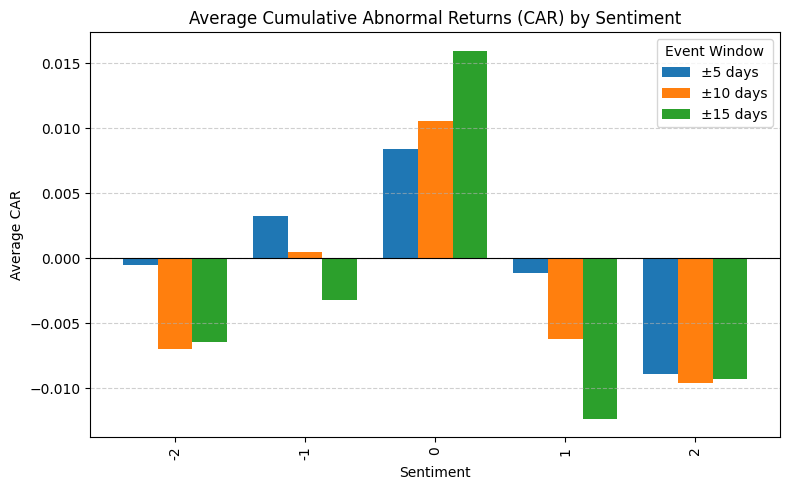

In [ ]:
#remove NaNs in CAR values
cars_clean = cars_df.dropna(subset=["CAR_5", "CAR_10", "CAR_15", "sentiment"]).copy()

# Compute mean CAR by sentiment
car_means = cars_clean.groupby("sentiment")[["CAR_5", "CAR_10", "CAR_15"]].mean()

# Reorder columns for clarity
car_means = car_means[["CAR_5", "CAR_10", "CAR_15"]]

# Plot
plt.figure(figsize=(8, 5))
car_means.plot(kind="bar", figsize=(8,5), width=0.8)
plt.title("Average Cumulative Abnormal Returns (CAR) by Sentiment")
plt.ylabel("Average CAR")
plt.xlabel("Sentiment")
plt.legend(["±5 days", "±10 days", "±15 days"], title="Event Window")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# Analysis of Cumulative Abnormal Returns (CARs) — EU

## 1. Average CAR by Sentiment

The first figure shows the **average cumulative abnormal returns (CARs)** by **sentiment category** (from very negative = -2 to very positive = 2) for three event windows:
- **±5 days** (blue)
- **±10 days** (orange)
- **±15 days** (green)

### Key observations:
- **Neutral sentiment (0)** events show **positive average CARs**, especially when measured over longer windows (±15 days).
- **Negative sentiment (-1, -2)** and **positive sentiment (1, 2)** tend to show **negative average CARs**, particularly in wider event windows.

This suggests that:
- Markets **reward neutrality**, perhaps interpreting neutral communication or news as a sign of stability.
- **Extreme sentiments** — both very positive and very negative — are met with **skepticism or concern** by investors, resulting in negative abnormal returns.



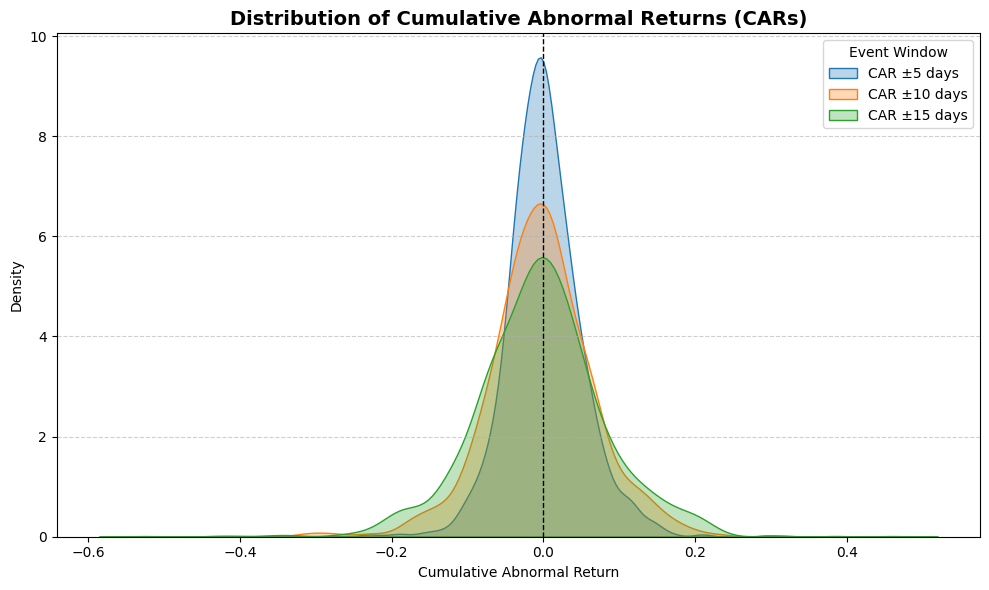

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data
cars_clean = cars_df.dropna(subset=["CAR_5", "CAR_10", "CAR_15"]).copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=cars_clean, x="CAR_5", label="CAR ±5 days", fill=True, alpha=0.3)
sns.kdeplot(data=cars_clean, x="CAR_10", label="CAR ±10 days", fill=True, alpha=0.3)
sns.kdeplot(data=cars_clean, x="CAR_15", label="CAR ±15 days", fill=True, alpha=0.3)

plt.axvline(0, color="black", linewidth=1, linestyle="--")
plt.title("Distribution of Cumulative Abnormal Returns (CARs)", fontsize=14, weight='bold')
plt.xlabel("Cumulative Abnormal Return")
plt.ylabel("Density")
plt.legend(title="Event Window", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


- Reactions in the are mostly short-term and centered around zero.
- Longer event windows show more dispersion (flatter graph), not stronger average effects.



# USA

## Prepare data

In [ ]:
US_final.columns

Index(['date', 'BANK OF AMERICA - TOT RETURN IND',
       'TRUIST FINANCIAL - TOT RETURN IND', 'BOK FINL. - TOT RETURN IND',
       'COMERICA - TOT RETURN IND', 'COMMERCE BCSH. - TOT RETURN IND',
       'CREDICORP - TOT RETURN IND', 'CULLEN FO.BANKERS - TOT RETURN IND',
       'DISCOVER FINANCIAL SVS. - TOT RETURN IND',
       'EAST WEST BANCORP - TOT RETURN IND',
       'FIFTH THIRD BANCORP - TOT RETURN IND',
       'FIRST CTZN.BCSH.A - TOT RETURN IND',
       'FIRST FINL.BKSH. - TOT RETURN IND',
       'FIRST HORIZON NATIONAL - TOT RETURN IND', 'FNB - TOT RETURN IND',
       'HUNTINGTON BCSH. - TOT RETURN IND', 'IBERIABANK - TOT RETURN IND',
       'KEYCORP - TOT RETURN IND', 'M&T BANK - TOT RETURN IND',
       'NEW YORK COMMUNITY BANCORP - TOT RETURN IND',
       'PACWEST BANCORP - TOT RETURN IND',
       'PEOPLES UNITED FINANCIAL - TOT RETURN IND',
       'PINNACLE FINANCIAL PTNS. - TOT RETURN IND',
       'PNC FINL.SVS.GP. - TOT RETURN IND', 'POPULAR - TOT RETURN IND',
       'PRO

In [ ]:
campaigns_US = data_US[data_US['corp_industry_sector1'] == 'Finance']
print(len(campaigns_US['company'].unique()))
print(campaigns_US['company'].unique())

252
['World Bank' 'IFC International Finance Corporation'
 'Inter-American Development Bank' 'Morgan Stanley'
 'Wells Fargo & Wachovia' 'Goldman Sachs Group, Inc.'
 'International Monetary Fund / IMF' 'BlackRock' 'Bank of America'
 'PNC Bank' 'ISDA ' 'JP Morgan Chase' 'Calvert Investments' 'Citigroup'
 'International Bank for Reconstruction and Development (IBRD)'
 'Fortress Investment Group LLC' 'GEICO' 'Travelers Companies'
 'American Express Company' 'Green Century Funds / Capital Management'
 'Ex-Im' 'Sankaty Advisors LLC' 'Mercury Insurance' 'Allstate'
 'Liberty Mutual' 'GE Capital' 'Fidelity Investments / FMR LLC' 'Vanguard'
 'Kaiser Permanente' 'Aetna' 'Cigna' 'Capital One' 'Discover Card'
 'Carlyle Group, L.P. ' 'Nasdaq Stock Market Inc.'
 'Equator Principles Association' 'Juridica' 'Blackstone Group' 'SunTrust'
 'U.S. Bank' 'State Farm Insurance' 'Bank of New York Mellon'
 'Marsh & McLennan (MMC)' 'Riversource Investments' 'Portola Group '
 'T Rowe Price' 'MBNA (UK)' 'Ernst & 

In [ ]:


# 1) Remove " - TOT RETURN IND" from US_final column names
US_panel = US_final.copy()
US_panel.columns = [
    c.replace(" - TOT RETURN IND", "") if isinstance(c, str) else c
    for c in US_panel.columns
]

factor_cols = {"date", "Mkt-RF", "SMB", "HML", "RF"}
canon_cols = [c for c in US_panel.columns if c not in factor_cols]
canon_upper_to_canon = {c.upper(): c for c in canon_cols}


# 2) Create 'correct_name' in campaigns_US
#    Step 1: case-insensitive exact matches

camp = campaigns_US.copy()
camp["company_clean"] = camp["company"].astype(str).str.strip()


camp["correct_name"] = (
    camp["company_clean"]
    .str.upper()
    .map(canon_upper_to_canon)
)


# 4) Step 2: manual alias mapping for common US variants
#    (Only keep aliases targeting names that exist in US_panel)
alias_map_raw = {
    # Big 6 and close variants
    "BANK OF AMERICA": "BANK OF AMERICA",
    "BANK OF AMERICA MERRILL LYNCH": "BANK OF AMERICA",
    "MERRILL LYNCH": "BANK OF AMERICA",

    "WELLS FARGO": "WELLS FARGO & CO",
    "WELLS FARGO & WACHOVIA": "WELLS FARGO & CO",
    "WELLS FARGO & WACHOVIA ": "WELLS FARGO & CO",

    "JP MORGAN CHASE": "JP MORGAN CHASE & CO.",
    "JPMORGAN CHASE": "JP MORGAN CHASE & CO.",
    "CHASE BANK": "JP MORGAN CHASE & CO.",

    "CITIGROUP": "CITIGROUP",
    "CITIBANK": "CITIGROUP",

    "GOLDMAN SACHS GROUP, INC.": "GOLDMAN SACHS GP.",
    "GOLDMAN SACHS ASSET MANAGEMENT": "GOLDMAN SACHS GP.",

    "AMERICAN EXPRESS COMPANY": "AMERICAN EXPRESS",
    "MASTERCARD": "MASTERCARD",
    "AMERICAN INTERNATIONAL GROUP (AIG)": "AMERICAN INTL.GP.",
    "AFLAC": "AFLAC",
    "AXIS CAPITAL": "AXIS CAPITAL HDG.",

    # Super-regionals & others in your panel
    "US BANCORP": "US BANCORP",
    "U.S. BANK": "US BANCORP",
    "US BANK": "US BANCORP",

    "PNC BANK": "PNC FINL.SVS.GP.",
    "PNC FINANCIAL": "PNC FINL.SVS.GP.",
    "PNC FINANCIAL SERVICES": "PNC FINL.SVS.GP.",

    "REGIONS BANK": "REGIONS FINL.NEW",
    "SUNTRUST": "TRUIST FINANCIAL",
    "SUN TRUST": "TRUIST FINANCIAL",
    "BRANCH BANKING AND TRUST BB&T": "TRUIST FINANCIAL",
    "TRUIST": "TRUIST FINANCIAL",

    "PEOPLES UNITED BANK": "PEOPLES UNITED FINANCIAL",
    "PEOPLE'S UNITED BANK": "PEOPLES UNITED FINANCIAL",

    "HUNTINGTON BANK": "HUNTINGTON BCSH.",
    "M&T BANK": "M&T BANK",
    "FIFTH THIRD BANK": "FIFTH THIRD BANCORP",
    "KEYBANK": "KEYCORP",
    "KEYCORP": "KEYCORP",
    "WEBSTER FINANCIAL": "WEBSTER FINANCIAL",
    "ZIONS BANK": "ZIONS BANCORP.",
    "SVB FINANCIAL": "SVB FINANCIAL GROUP",

    "BANK OF NEW YORK MELLON": "BANK OF NEW YORK MELLON",
    "BNY MELLON": "BANK OF NEW YORK MELLON",
    "BANK OF NEW YORK MELLON / BNY MELLON": "BANK OF NEW YORK MELLON",

    "DISCOVER FINANCIAL SERVICES": "DISCOVER FINANCIAL SVS.",
    "DISCOVER CARD": "DISCOVER FINANCIAL SVS.",

    # Niche / special tickers present in your panel
    "ACE CASH EXPRESS": "ACE CASH EXPRESS (BER) DEAD - 10/10/06",
    "LEHMAN BROTHERS HOLDINGS INC.": "LEHMAN BROS.HDG.CAP.TST. III PF.SR.K",

    "COMERICA": "COMERICA",
}

# keep only aliases that point to existing columns
alias_map = {k: v for k, v in alias_map_raw.items() if v in canon_cols}

mask_na = camp["correct_name"].isna()
camp.loc[mask_na, "correct_name"] = (
    camp.loc[mask_na, "company_clean"].str.upper().map(alias_map)
)

# 5) Drop rows we don't have data for (no match)

campaigns_US_matched = camp[camp["correct_name"].notna()].copy()

# Clean up helper column
campaigns_US_matched = campaigns_US_matched.drop(columns=["company_clean"])

# 6) Summary
print("US_final columns (after cleaning):", len(canon_cols))
print("Campaigns before:", len(campaigns_US))
print("Campaigns matched:", len(campaigns_US_matched))
print("Unique matched banks:", campaigns_US_matched["correct_name"].nunique())

# List of unmatched companies for review
unmatched = camp.loc[camp["correct_name"].isna(), "company"].dropna().unique()
print("Unmatched (sample up to 30):", unmatched[:30])


US_final columns (after cleaning): 53
Campaigns before: 2038
Campaigns matched: 946
Unique matched banks: 27
Unmatched (sample up to 30): ['World Bank' 'IFC International Finance Corporation'
 'Inter-American Development Bank' 'Morgan Stanley'
 'International Monetary Fund / IMF' 'BlackRock' 'ISDA '
 'Calvert Investments'
 'International Bank for Reconstruction and Development (IBRD)'
 'Fortress Investment Group LLC' 'GEICO' 'Travelers Companies'
 'Green Century Funds / Capital Management' 'Ex-Im' 'Sankaty Advisors LLC'
 'Mercury Insurance' 'Allstate' 'Liberty Mutual' 'GE Capital'
 'Fidelity Investments / FMR LLC' 'Vanguard' 'Kaiser Permanente' 'Aetna'
 'Cigna' 'Capital One' 'Carlyle Group, L.P. ' 'Nasdaq Stock Market Inc.'
 'Equator Principles Association' 'Juridica' 'Blackstone Group']


In [ ]:
campaigns_US_matched

,Unnamed: 0,uid_archive,date,company_code,company,company_type,company_parent_code,company_parent,company_parent_country,sentiment,...,industry_sector3,industry_sector_code4,industry_sector4,report,link1,link2,link3,link4,link5,correct_name
46,130,35212,2010-12-17,376,Wells Fargo & Wachovia,Parent,376,Wells Fargo & Wachovia,US,1,...,NaN,NaN,NaN,to corporate political disclosure resolutions...,http://www.politicalaccountability.net/index.p...,NaN,NaN,NaN,NaN,WELLS FARGO & CO
47,131,35212,2010-12-17,1109,"Goldman Sachs Group, Inc.",Parent,1109,"Goldman Sachs Group, Inc.",US,0,...,NaN,NaN,NaN,to corporate political disclosure resolutions...,http://www.politicalaccountability.net/index.p...,NaN,NaN,NaN,NaN,GOLDMAN SACHS GP.
86,220,35147,2010-12-13,1109,"Goldman Sachs Group, Inc.",Parent,1109,"Goldman Sachs Group, Inc.",US,-1,...,Mining & Metals,NaN,NaN,"In Malaysia, Pesticide Action Network Asia-Pac...",http://www.panap.net/sites/default/files/Turni...,http://www.panap.net/en/fs/post/food-sovereign...,NaN,NaN,NaN,GOLDMAN SACHS GP.
109,275,35075,2010-12-08,54,Bank of America,Parent,54,Bank of America,US,-1,...,NaN,NaN,NaN,"In the U.S., Climate Counts claimed overall sc...",http://blog.climatecounts.org/2010/12/climate-...,http://www.facebook.com/pages/Climate-Counts/7...,NaN,NaN,NaN,BANK OF AMERICA
113,280,35075,2010-12-08,582,PNC Bank,Parent,582,PNC Bank,US,-1,...,NaN,NaN,NaN,"In the U.S., Climate Counts claimed overall sc...",http://blog.climatecounts.org/2010/12/climate-...,http://www.facebook.com/pages/Climate-Counts/7...,NaN,NaN,NaN,PNC FINL.SVS.GP.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24651,12033,80807,2018-01-24,54,Bank of America,Parent,54,Bank of America,USA,2,...,Finance,NaN,NaN,", they claimed that 122 multinational business...",https://www.theclimategroup.org/news/world-lea...,NaN,NaN,NaN,NaN,BANK OF AMERICA
24683,12116,80753,2018-01-19,372,Citigroup,Parent,372,Citigroup,USA,-1,...,Finance,NaN,NaN,", produced by Don't Panic! London, and events ...",http://www.greenpeace.org/international/en/pre...,https://www.greenpeace.org/mexico/es/Noticias/...,http://www.greenpeace.org/italy/it/ufficiostam...,https://www.greenpeace.ch/2018/01/18/und-jetzt...,NaN,CITIGROUP
24684,12117,80753,2018-01-19,373,JP Morgan Chase,Parent,373,JP Morgan Chase,USA,-1,...,Finance,NaN,NaN,", produced by Don't Panic! London, and events ...",http://www.greenpeace.org/international/en/pre...,https://www.greenpeace.org/mexico/es/Noticias/...,http://www.greenpeace.org/italy/it/ufficiostam...,https://www.greenpeace.ch/2018/01/18/und-jetzt...,NaN,JP MORGAN CHASE & CO.
24709,12178,80720,2018-01-18,54,Bank of America,Parent,54,Bank of America,USA,-1,...,"Mining, Metals & Quarrying",NaN,NaN,AUSTRALIA / SINGAPORE / VIETNAM - Market Force...,https://www.marketforces.org.au/research/singa...,NaN,NaN,NaN,NaN,BANK OF AMERICA


## COMPUTE CARs

In [ ]:
def ols_fit(X: np.ndarray, y: np.ndarray):
    mask = np.isfinite(y)
    for j in range(X.shape[1]):
        mask &= np.isfinite(X[:, j])
    Xc, yc = X[mask], y[mask]
    if len(yc) < X.shape[1] + 10:
        return None
    beta, *_ = np.linalg.lstsq(Xc, yc, rcond=None)
    return beta


# Prepare US panel

US_panel = US_panel.copy()
if not np.issubdtype(US_panel["date"].dtype, np.datetime64):
    US_panel["date"] = pd.to_datetime(US_panel["date"], errors="coerce")
US_panel = US_panel.sort_values("date").reset_index(drop=True)
dates_index = pd.DatetimeIndex(US_panel["date"])

FACTOR_COLS = ["Mkt-RF", "SMB", "HML", "RF"]
for col in FACTOR_COLS:
    if col not in US_panel.columns:
        raise ValueError(f"Missing factor {col} in US_panel")

exclude = {"date"} | set(FACTOR_COLS)
us_banks = [c for c in US_panel.columns if c not in exclude]

# Prepare US campaigns

camps = campaigns_US_matched.copy()
if not np.issubdtype(camps["date"].dtype, np.datetime64):
    camps["date"] = pd.to_datetime(camps["date"], errors="coerce")

# Choose best issue name column
issue_col = next((c for c in ["issue_name_1", "issue_name1", "issue_name"] if c in camps.columns), None)


# CAR function
def compute_car_for_event(event_date: pd.Timestamp,
                          bank: str,
                          sentiment,
                          issue):
    """Compute CAR5, CAR20 (±10), CAR15 for one event."""
    if bank not in us_banks:
        return None
    try:
        t_idx = dates_index.get_loc(event_date)
        if isinstance(t_idx, slice):
            t_idx = t_idx.start
    except KeyError:
        return None

    est_start, est_end = t_idx - 300, t_idx - 50
    if est_start < 0 or est_end <= est_start:
        return None

    y_est = US_panel.iloc[est_start:est_end + 1][bank].to_numpy() - US_panel.iloc[est_start:est_end + 1]["RF"].to_numpy()
    X_est = US_panel.iloc[est_start:est_end + 1][["Mkt-RF", "SMB", "HML"]].to_numpy()
    X_est = np.column_stack([np.ones(len(X_est)), X_est])
    beta = ols_fit(X_est, y_est)
    if beta is None:
        return None

    def car(half):
        w0, w1 = t_idx - half, t_idx + half
        if w0 < 0 or w1 >= len(US_panel):
            return np.nan
        y_act = US_panel.iloc[w0:w1 + 1][bank].to_numpy() - US_panel.iloc[w0:w1 + 1]["RF"].to_numpy()
        X_evt = US_panel.iloc[w0:w1 + 1][["Mkt-RF", "SMB", "HML"]].to_numpy()
        X_evt = np.column_stack([np.ones(len(X_evt)), X_evt])
        y_hat = X_evt @ beta
        return float(np.nansum(y_act - y_hat))

    return {
        "date_of_announcement": event_date,
        "company": bank,
        "sentiment": sentiment,
        "CAR_5": car(5),
        "CAR_10": car(10),
        "CAR_15": car(15),
        "issue_name_1": issue
    }

# Iterate over all US campaigns

results_us = []
for _, row in camps.iterrows():
    evt_date = row["date"]
    if pd.isna(evt_date):
        continue
    bank = str(row["correct_name"]).strip()
    if not bank:
        continue
    sentiment = row["sentiment"] if "sentiment" in row else np.nan
    issue = row[issue_col] if issue_col and issue_col in row.index else np.nan
    out = compute_car_for_event(evt_date, bank, sentiment, issue)
    if out is not None:
        results_us.append(out)

cars_us = pd.DataFrame(results_us).sort_values("date_of_announcement").reset_index(drop=True)


print(f"Computed CARs for {len(cars_us)} U.S. campaigns.")
cars_us.head(10)


Computed CARs for 946 U.S. campaigns.


,date_of_announcement,company,sentiment,CAR_5,CAR_10,CAR_15,issue_name_1
0,2010-04-05,JP MORGAN CHASE & CO.,-1,-0.070491,-0.049952,-0.122820,Oilsands and oilshale
1,2010-04-05,CITIGROUP,-2,-0.018422,0.157948,0.055660,CSR/ESG standards for financial institutions
2,2010-04-09,DISCOVER FINANCIAL SVS.,-2,-0.026032,-0.092023,-0.087922,Junk mail
3,2010-04-09,AMERICAN EXPRESS,-2,0.043998,0.000770,0.018330,Junk mail
4,2010-04-09,BANK OF AMERICA,-2,-0.005177,-0.179725,-0.118855,Junk mail
5,2010-04-19,JP MORGAN CHASE & CO.,-2,-0.080023,-0.078298,-0.083452,Coal mining - mountaintop removal MTR
6,2010-05-14,PNC FINL.SVS.GP.,0,0.050267,0.144209,0.120111,"Financial institutions & carbon, divestment"
7,2010-05-14,WELLS FARGO & CO,0,0.058219,0.086203,0.139777,"Financial institutions & carbon, divestment"
8,2010-05-14,JP MORGAN CHASE & CO.,0,0.063846,0.105758,0.117714,"Financial institutions & carbon, divestment"
9,2010-05-14,CITIGROUP,-1,-0.000782,0.040769,0.009289,"Financial institutions & carbon, divestment"


<Figure size 800x500 with 0 Axes>

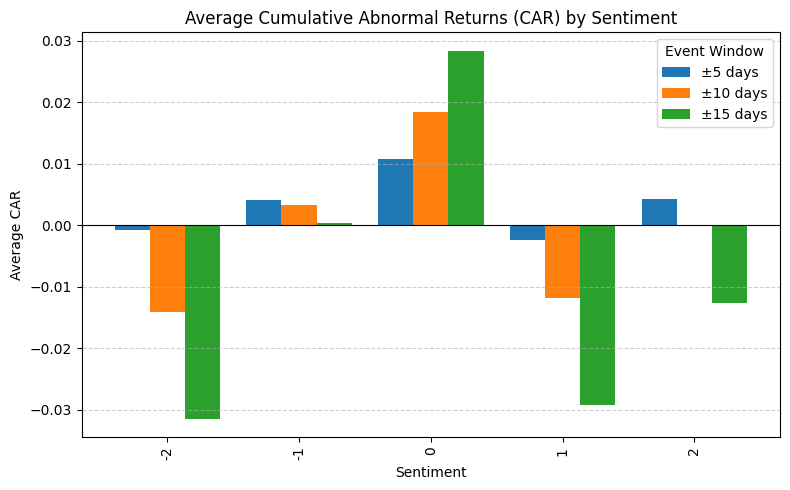

In [ ]:
# Ensure CARs dataframe exists
assert 'cars_us' in globals(), "Run the CAR computation cell first."

# Clean: remove NaNs in CAR values
cars_clean = cars_us.dropna(subset=["CAR_5", "CAR_10", "CAR_15", "sentiment"]).copy()

# Compute mean CAR by sentiment
car_means = cars_clean.groupby("sentiment")[["CAR_5", "CAR_10", "CAR_15"]].mean()

# Reorder columns for clarity
car_means = car_means[["CAR_5", "CAR_10", "CAR_15"]]

# Plot
plt.figure(figsize=(8, 5))
car_means.plot(kind="bar", figsize=(8,5), width=0.8)
plt.title("Average Cumulative Abnormal Returns (CAR) by Sentiment")
plt.ylabel("Average CAR")
plt.xlabel("Sentiment")
plt.legend(["±5 days", "±10 days", "±15 days"], title="Event Window")
plt.axhline(0, color="black", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

US

The first figure shows **average CARs by sentiment** for the US  
A few clear patterns stand out:

- **Neutral sentiment (0)** yields **positive average CARs**, increasing with wider event windows (especially ±15 days).
- **Negative sentiment (-1, -2)** and **positive sentiment (1, 2)** both lead to **negative CARs**, with the strongest negative effects at **extreme sentiment values (±2)**.
- The **amplitude** of reactions is larger than in the European data — U.S. stocks appear **more volatile** around sentiment-driven events.

This suggests that the U.S. market reacts **more strongly** to sentiment extremes, possibly reflecting a more sentiment-sensitive or speculative investor base.


# **Task #6** : Do NGOs campaigns matter ?

In [ ]:

#Define some helpers to then run statistical tests

#Convert all event dates to datetime and standardize column names.
def ensure_datetime(df, col):
    if col in df.columns and not np.issubdtype(df[col].dtype, np.datetime64):
        df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

#Winsorize CARs at the 1% tails to reduce the impact of outliers.
def winsorize(s: pd.Series, p: float = 0.01) -> pd.Series:

    s = pd.to_numeric(s, errors="coerce")
    lo, hi = s.quantile([p, 1 - p])
    return s.clip(lower=lo, upper=hi)

#Remove overlapping events for the same firm that occur within 20 calendar days.
def drop_overlaps(df: pd.DataFrame, date_col: str = "date_of_announcement",
                  firm_col: str = "company", gap: int = 20) -> pd.DataFrame:

    df = df.copy()
    df = ensure_datetime(df, date_col)
    df = df.sort_values([firm_col, date_col]).reset_index(drop=True)

    keep = np.ones(len(df), dtype=bool)
    last_date = {}

    for i, (d, f) in enumerate(zip(df[date_col].values, df[firm_col].values)):
        if pd.isna(d):
            keep[i] = False
            continue
        prev = last_date.get(f)
        if prev is not None and not pd.isna(prev):
            # Safe calendar-day difference (float)
            delta_days = (pd.Timestamp(d) - pd.Timestamp(prev)) / np.timedelta64(1, "D")
            if delta_days <= gap:
                keep[i] = False
                continue
        last_date[f] = d

    return df.loc[keep].copy()


#Combine EU and US samples (if both are provided) and add a "post_COP21" flag that identifies events occurring after the 2015 Paris Agreement (COP21).

def assemble_and_sanitize(eu_df: pd.DataFrame | None = None,
                          us_df: pd.DataFrame | None = None,
                          winsor_p: float = 0.01,
                          overlap_gap_days: int = 20) -> pd.DataFrame:
    """Combine EU/US CAR tables, winsorize CARs, drop overlapping events, add COP21 flag."""
    frames = []
    if eu_df is not None:
        frames.append(eu_df.assign(region="EU"))
    if us_df is not None:
        frames.append(us_df.assign(region="US"))
    if not frames:
        raise ValueError("No CAR dataframes found. Provide cars_df and/or cars_us.")

    cars = pd.concat(frames, ignore_index=True)

    # Standardize date column name if needed
    if "date_of_announcement" not in cars.columns and "date" in cars.columns:
        cars = cars.rename(columns={"date": "date_of_announcement"})
    cars = ensure_datetime(cars, "date_of_announcement")

    # Ensure CAR columns exist and numeric
    car_cols = [c for c in ["CAR_5", "CAR_10", "CAR_15"] if c in cars.columns]
    if not car_cols:
        raise ValueError("No CAR columns found; expected one or more of: CAR_5, CAR_10, CAR_15.")

    for c in car_cols:
        cars[c] = winsorize(cars[c], p=winsor_p)

    # Drop overlapping events (calendar days; trading-day variant available if you prefer)
    cars_clean = drop_overlaps(cars, date_col="date_of_announcement",
                               firm_col="company", gap=overlap_gap_days)

    # Pre/Post COP21 split
    COP21 = pd.Timestamp("2015-12-12")
    cars_clean["post_COP21"] = (cars_clean["date_of_announcement"] >= COP21).astype(int)

    return cars_clean


In [ ]:

#Define funciton helpers: t-test, sign test, bootstrap CI

#standard two-sided t-test for the mean (returns N, mean, t-statistic, and p-value).
def one_sample_t_test(x: pd.Series):
    x = pd.Series(x).dropna()
    n = len(x)
    if n < 3:
        return n, np.nan, np.nan, np.nan
    mean = x.mean()
    sd = x.std(ddof=1)
    tstat = mean / (sd / np.sqrt(n)) if sd > 0 else np.inf
    # p-value
    try:
        from scipy import stats
        pval = 2 * stats.t.sf(np.abs(tstat), df=n - 1)
    except Exception:
        # normal approximation fallback
        from math import erf, sqrt
        pval = 2 * (1 - 0.5 * (1 + erf(np.abs(tstat) / np.sqrt(2))))
    return n, mean, tstat, pval

#test based on the proportion of positive vs. negative CARs.
def sign_test(x: pd.Series):
    x = pd.Series(x).dropna()
    pos = (x > 0).sum()
    neg = (x < 0).sum()
    n = pos + neg
    if n == 0:
        return 0, np.nan
    try:
        from scipy.stats import binomtest
        pval = binomtest(pos, n, 0.5, alternative="two-sided").pvalue
    except Exception:
        # normal approx to binomial
        phat = pos / n
        from math import erf, sqrt
        z = (phat - 0.5) / np.sqrt(0.5 * 0.5 / n)
        pval = 2 * (1 - 0.5 * (1 + erf(np.abs(z) / np.sqrt(2))))
    return n, pval

#computes the mean and its 95% bootstrap confidence interval
def bootstrap_mean_ci(x: pd.Series, B: int = 5000, alpha: float = 0.05, random_state: int = 42):
    """Bootstrap CI for the mean (percentile CI). Returns: mean_hat, (lo, hi)."""
    rng = np.random.default_rng(random_state)
    x = pd.Series(x).dropna().to_numpy()
    n = len(x)
    if n == 0:
        return np.nan, (np.nan, np.nan)
    boots = rng.choice(x, size=(B, n), replace=True).mean(axis=1)
    mean_hat = x.mean()
    lo, hi = np.quantile(boots, [alpha / 2, 1 - alpha / 2])
    return mean_hat, (lo, hi)



In [ ]:

# Prepare data to run statistical tests

def summarize_group(df: pd.DataFrame, window: str) -> pd.Series:
    x = pd.to_numeric(df[window], errors="coerce").dropna()
    n, mean_, tstat, p_t = one_sample_t_test(x)
    n_sign, p_sign = sign_test(x)
    mean_boot, (ci_lo, ci_hi) = bootstrap_mean_ci(x)
    return pd.Series({
        "N": n,
        "mean": mean_,
        "tstat": tstat,
        "p_ttest": p_t,
        "mean_boot": mean_boot,
        "ci_low": ci_lo,
        "ci_high": ci_hi,
        "N_sign": n_sign,
        "p_sign": p_sign
    })

def run_tests(cars: pd.DataFrame, groupby_cols, windows=("CAR_5", "CAR_10", "CAR_15")) -> pd.DataFrame:
    """
    Run one-sample tests for each CAR window within each group.
    groupby_cols: list/tuple or scalar (column name(s) to group by)
    """
    out = []
    if not isinstance(groupby_cols, (list, tuple)):
        groupby_cols = [groupby_cols] if groupby_cols else []

    # No grouping: use a single group over the whole df
    if not groupby_cols:
        tmp = {}
        for w in windows:
            if w in cars.columns:
                res = summarize_group(cars, w)
                out.append({"window": w, **res.to_dict()})
        return pd.DataFrame(out)

    g = cars.groupby(groupby_cols, dropna=False)
    for keys, df in g:
        keys = (keys,) if not isinstance(keys, tuple) else keys
        rowkey = dict(zip(groupby_cols, keys))
        for w in windows:
            if w in df.columns:
                res = summarize_group(df, w)
                out.append({**rowkey, "window": w, **res.to_dict()})
    return pd.DataFrame(out)


In [ ]:
# C) Execute tests (overall, by sentiment, COP21, interactions, region)


# Assemble & sanitize (EU + US)
eu_src = cars_df if 'cars_df' in globals() else None
us_src = cars_us if 'cars_us' in globals() else None
cars_all_clean = assemble_and_sanitize(eu_src, us_src, winsor_p=0.01, overlap_gap_days=20)



For each campaign (date × bank), we estimated a Fama–French 3-factor model over an estimation window
[t−300,t−50]
[t−300,t−50] trading days, then computed abnormal returns and summed them over event windows ±5, ±10, ±15 trading days to get CAR_5, CAR_10, CAR_15. We also cleaned the sample (winsorized 1%, de-overlapped close events) and tested whether mean CARs differ from zero (t-test, sign test, bootstrap CIs).

**Overall Test**

In [ ]:
# 2) Overall tests
overall = run_tests(cars_all_clean, groupby_cols=[], windows=("CAR_5","CAR_10","CAR_15"))
print("\n=== Overall tests ===")
overall



=== Overall tests ===


,window,N,mean,tstat,p_ttest,mean_boot,ci_low,ci_high,N_sign,p_sign
0,CAR_5,1302.0,0.001214,0.974377,0.330051,0.001214,-0.001214,0.003638,1299.0,0.955750
1,CAR_10,1302.0,-0.002008,-1.155616,0.248051,-0.002008,-0.005422,0.001367,1299.0,0.291726
2,CAR_15,1302.0,-0.004072,-1.890269,0.058944,-0.004072,-0.008249,0.000121,1299.0,0.739188


Across all campaigns and banks, average price reactions are small and not statistically significant, with only a borderline negative signal at ±15 days (p≈0.07). In other words, on average NGO campaigns don’t move prices.

**By Sentiment**

In [ ]:
# 3) By sentiment
if "sentiment" in cars_all_clean.columns:
    by_sent = run_tests(cars_all_clean, groupby_cols="sentiment")
    print("\n=== By sentiment ===")
    display(by_sent.sort_values(["window","sentiment"]))


=== By sentiment ===


,sentiment,window,N,mean,tstat,p_ttest,mean_boot,ci_low,ci_high,N_sign,p_sign
1,-2,CAR_10,554.0,-0.007399,-2.615991,0.009140,-0.007399,-0.012953,-0.001916,552.0,0.005616
4,-1,CAR_10,505.0,0.002461,0.946087,0.344558,0.002461,-0.002564,0.007653,504.0,0.349585
7,0,CAR_10,67.0,0.017291,2.350333,0.021755,0.017291,0.002599,0.031591,67.0,0.049800
10,1,CAR_10,125.0,-0.006159,-1.174040,0.242629,-0.006159,-0.016716,0.003782,125.0,0.210327
13,2,CAR_10,51.0,-0.002876,-0.307051,0.760080,-0.002876,-0.021579,0.014495,51.0,0.779768
2,-2,CAR_15,554.0,-0.008616,-2.482762,0.013332,-0.008616,-0.015361,-0.001788,552.0,0.418716
5,-1,CAR_15,505.0,0.000539,0.164812,0.869158,0.000539,-0.005766,0.006932,504.0,0.624193
8,0,CAR_15,67.0,0.021413,2.357388,0.021378,0.021413,0.003364,0.038964,67.0,0.013934
11,1,CAR_15,125.0,-0.015556,-2.424437,0.016775,-0.015556,-0.028196,-0.002751,125.0,0.048662
14,2,CAR_15,51.0,-0.005703,-0.480945,0.632653,-0.005703,-0.027867,0.017539,51.0,0.779768


If we test differences based on sentiment we start noticing some signficant results. The sentiment results show that market reactions depend strongly on tone.
Strongly negative (–2) campaigns lead to significant stock declines, with CAR₁₀ around –0.7% and CAR₁₅ around –0.8% (p ≈ 0.01–0.02), indicating that critical NGO actions reduce firm value.
Neutral campaigns, in contrast, show positive and significant CARs across all windows (about +1.7% to +2.1%), suggesting investors respond favorably to neutral or cooperative announcements.
Positive campaigns produce non significant results usually assosciated to small declines.

**Pre and Post COP21**

In [ ]:
# 4) Pre vs Post COP21
by_cop21 = run_tests(cars_all_clean, groupby_cols="post_COP21")
print("\n=== Pre (0) vs Post (1) COP21 ===")
display(by_cop21.sort_values(["window","post_COP21"]))



=== Pre (0) vs Post (1) COP21 ===


,post_COP21,window,N,mean,tstat,p_ttest,mean_boot,ci_low,ci_high,N_sign,p_sign
1,0,CAR_10,770.0,0.000868,0.384989,0.700352,0.000868,-0.003528,0.005268,768.0,1.000000
4,1,CAR_10,532.0,-0.006171,-2.268609,0.023693,-0.006171,-0.011385,-0.001040,531.0,0.099044
2,0,CAR_15,770.0,0.000027,0.009720,0.992247,0.000027,-0.005337,0.005470,768.0,0.295350
5,1,CAR_15,532.0,-0.010005,-2.997266,0.002852,-0.010005,-0.016314,-0.003611,531.0,0.068256
0,0,CAR_5,770.0,0.002487,1.531468,0.126065,0.002487,-0.000692,0.005700,768.0,0.691447
3,1,CAR_5,532.0,-0.000628,-0.323546,0.746409,-0.000628,-0.004470,0.003081,531.0,0.728499


The pre- and post-COP21 comparison shows a clear shift in market sensitivity after 2015.
Before COP21, average CARs are close to zero and statistically insignificant across all windows, indicating that NGO campaigns had little effect on prices.
After COP21, CAR₁₀ and CAR₁₅ turn negative and significant (around –0.6% and –1.0%, p ≈ 0.03 and 0.004), suggesting that since the Paris Agreement, investors have reacted more strongly and negatively to campaign news.

**By Sentiment Pre-Post COP21**

In [ ]:
# 5) Sentiment × COP21
if "sentiment" in cars_all_clean.columns:
    by_sent_cop = run_tests(cars_all_clean, groupby_cols=["sentiment","post_COP21"])
    print("\n=== By sentiment × COP21 ===")
    display(by_sent_cop.sort_values(["window","sentiment","post_COP21"]))



=== By sentiment × COP21 ===


,sentiment,post_COP21,window,N,mean,tstat,p_ttest,mean_boot,ci_low,ci_high,N_sign,p_sign
1,-2,0,CAR_10,339.0,-0.004909,-1.334038,0.183090,-0.004909,-0.012034,0.002299,338.0,0.044004
4,-2,1,CAR_10,215.0,-0.011326,-2.569402,0.010867,-0.011326,-0.019760,-0.002721,214.0,0.064687
7,-1,0,CAR_10,269.0,0.004074,1.200521,0.230997,0.004074,-0.002623,0.010554,268.0,0.199480
10,-1,1,CAR_10,236.0,0.000622,0.155158,0.876830,0.000622,-0.007216,0.008668,236.0,1.000000
13,0,0,CAR_10,63.0,0.022681,3.197855,0.002181,0.022681,0.008794,0.036834,63.0,0.011141
16,0,1,CAR_10,4.0,-0.067603,-2.121839,0.123966,-0.067603,-0.119523,-0.015683,4.0,0.125000
19,1,0,CAR_10,73.0,-0.004658,-0.639447,0.524561,-0.004658,-0.018829,0.009205,73.0,0.349182
22,1,1,CAR_10,52.0,-0.008266,-1.109239,0.272530,-0.008266,-0.022292,0.006439,52.0,0.488456
25,2,0,CAR_10,26.0,0.005683,0.445986,0.659446,0.005683,-0.019419,0.030874,26.0,0.557197
28,2,1,CAR_10,25.0,-0.011778,-0.853065,0.402057,-0.011778,-0.039110,0.013469,25.0,1.000000


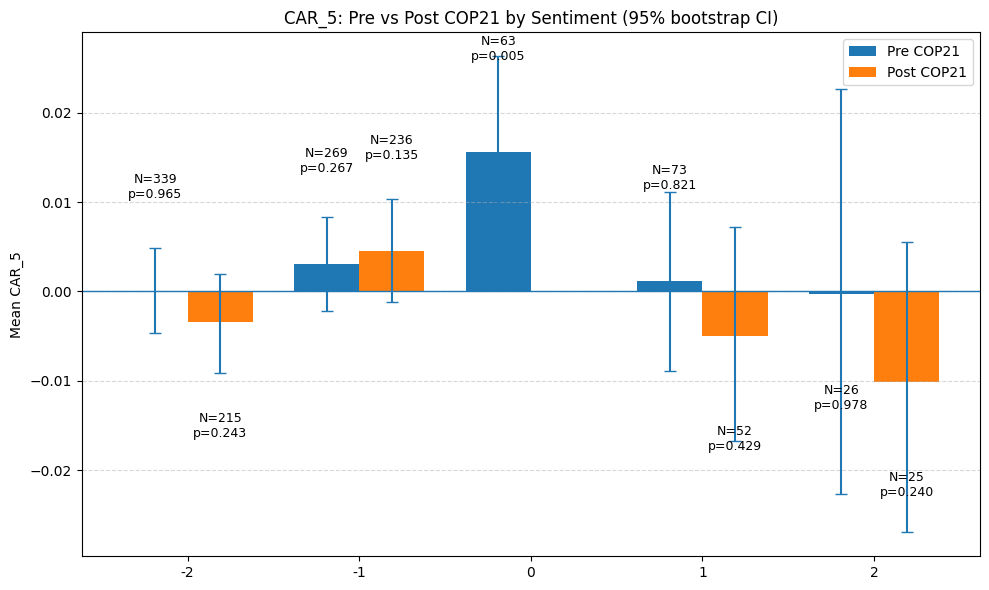

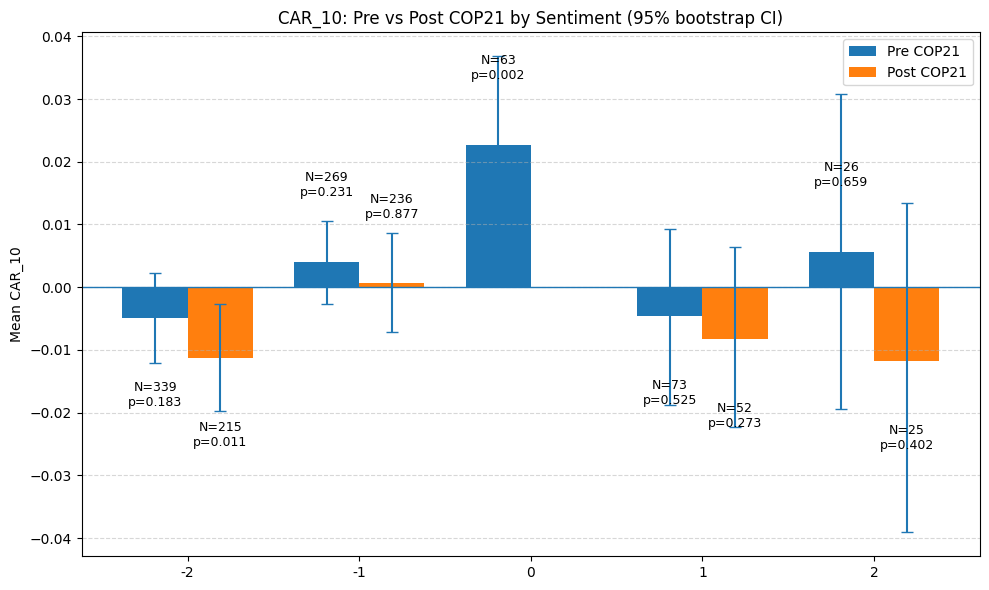

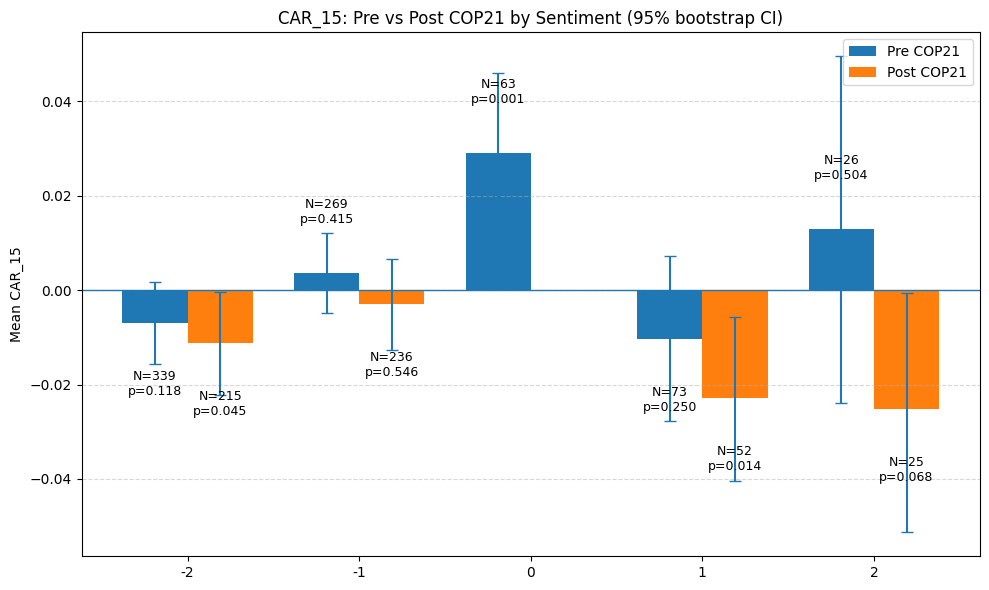

In [ ]:
from pathlib import Path

outdir = Path("figures_present")
outdir.mkdir(exist_ok=True)

bsc = by_sent_cop.copy()

# Ensure numeric types
bsc["post_COP21"] = pd.to_numeric(bsc["post_COP21"], errors="coerce").astype("Int64")
bsc["sentiment"]  = pd.to_numeric(bsc["sentiment"], errors="coerce")

# Which windows are present
windows = [w for w in ["CAR_5","CAR_10","CAR_15"] if w in bsc["window"].unique()]
if not windows:
    raise ValueError("No expected windows found in by_sent_cop (need one of CAR_5, CAR_10, CAR_15).")

def plot_sentiment_x_cop21(summary_df, window, min_n=10):

    dfw = summary_df[summary_df["window"] == window].copy()
    # Filter small cells if desired
    dfw = dfw[dfw["N"] >= min_n]

    if dfw.empty:
        print(f"No sufficient rows for {window}.")
        return

    # Sentiments sorted numerically
    sentiments = sorted(dfw["sentiment"].dropna().unique())
    # Ensure both pre/post rows exist even if missing → we'll plot NaNs as gaps
    groups = []
    for s in sentiments:
        for pp in (0, 1):
            row = dfw[(dfw["sentiment"] == s) & (dfw["post_COP21"] == pp)]
            if row.empty:
                groups.append({"sentiment": s, "post_COP21": pp, "mean": np.nan,
                               "ci_low": np.nan, "ci_high": np.nan, "N": 0, "p_ttest": np.nan})
            else:
                r = row.iloc[0]
                groups.append({"sentiment": s, "post_COP21": pp, "mean": float(r["mean"]),
                               "ci_low": float(r["ci_low"]), "ci_high": float(r["ci_high"]),
                               "N": float(r["N"]), "p_ttest": float(r["p_ttest"])})
    plot_df = pd.DataFrame(groups)

    # Build vectors
    x = np.arange(len(sentiments))
    bar_w = 0.38

    def vec(col, post_flag):
        out = []
        for s in sentiments:
            r = plot_df[(plot_df["sentiment"] == s) & (plot_df["post_COP21"] == post_flag)]
            out.append(r.iloc[0][col] if not r.empty else np.nan)
        return np.array(out, dtype=float)

    mean_pre  = vec("mean", 0)
    mean_post = vec("mean", 1)
    ciL_pre   = vec("ci_low", 0)
    ciH_pre   = vec("ci_high", 0)
    ciL_post  = vec("ci_low", 1)
    ciH_post  = vec("ci_high", 1)
    N_pre     = vec("N", 0)
    N_post    = vec("N", 1)
    p_pre     = vec("p_ttest", 0)
    p_post    = vec("p_ttest", 1)

    yerr_pre  = np.vstack([mean_pre - ciL_pre,  ciH_pre  - mean_pre])
    yerr_post = np.vstack([mean_post - ciL_post, ciH_post - mean_post])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - bar_w/2, mean_pre,  width=bar_w, label="Pre COP21")
    ax.bar(x + bar_w/2, mean_post, width=bar_w, label="Post COP21")
    ax.errorbar(x - bar_w/2, mean_pre,  yerr=yerr_pre,  fmt="none", capsize=4)
    ax.errorbar(x + bar_w/2, mean_post, yerr=yerr_post, fmt="none", capsize=4)

    ax.axhline(0, linewidth=1)
    ax.set_xticks(x)
    ax.set_xticklabels([str(int(s)) if not np.isnan(s) else "NaN" for s in sentiments])
    ax.set_ylabel(f"Mean {window}")
    ax.set_title(f"{window}: Pre vs Post COP21 by Sentiment (95% bootstrap CI)")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # Annotate N and p on each bar
    def annotate(ax, xs, ys, Ns, Ps):
        for xi, yi, n, p in zip(xs, ys, Ns, Ps):
            if np.isnan(yi):
                continue
            yoff = 0.01 if yi >= 0 else -0.01
            label = f"N={int(n)}"
            if not np.isnan(p):
                label += f"\np={p:.3f}"
            ax.text(xi, yi + yoff, label,
                    ha="center", va="bottom" if yi>=0 else "top", fontsize=9)

    annotate(ax, x - bar_w/2, mean_pre,  N_pre,  p_pre)
    annotate(ax, x + bar_w/2, mean_post, N_post, p_post)

    plt.tight_layout()
    Path("figures_present").mkdir(exist_ok=True)
    plt.savefig(Path("figures_present") / f"{window}_sentiment_x_COP21_from_summary.png", dpi=150)
    plt.show()

# Make one figure per window
for w in windows:
    plot_sentiment_x_cop21(bsc, w, min_n=10)


Before COP21, negative campaigns (–2) already had small declines but were not statistically significant. After COP21, these same strongly negative events produced larger and significant drops, with CAR₁₀ around –1.1% (p ≈ 0.014).
For neutral events (0), the pre-COP21 period shows positive CARs (about +1.5% to +2.9%), while the few post-COP21 observations turn negative, though with very small samples.
Positive campaigns (1, 2) remain mixed and mostly insignificant, except for sentiment 1 post-COP21, where CAR₁₅ ≈ –2.3% (p ≈ 0.016).
*Sentiment 0 post C0P21 are not shown in the table as they were just 4 events.

In [ ]:
# 6) By region (EU vs US)
if "region" in cars_all_clean.columns:
    by_region = run_tests(cars_all_clean, groupby_cols="region")
    print("\n=== By region ===")
    display(by_region.sort_values(["window","region"]))


=== By region ===


,region,window,N,mean,tstat,p_ttest,mean_boot,ci_low,ci_high,N_sign,p_sign
1,EU,CAR_10,793.0,-2.660614e-03,-1.120802,0.262712,-2.660614e-03,-0.007422,0.002009,792.0,0.240936
4,US,CAR_10,509.0,-9.918766e-04,-0.401825,0.687982,-9.918766e-04,-0.005671,0.004044,507.0,0.859023
2,EU,CAR_15,793.0,-3.750439e-03,-1.271251,0.204013,-3.750439e-03,-0.009544,0.002048,792.0,0.749142
5,US,CAR_15,509.0,-4.572377e-03,-1.502970,0.133468,-4.572377e-03,-0.010389,0.001456,507.0,0.929234
0,EU,CAR_5,793.0,-8.289843e-07,-0.000477,0.999619,-8.289843e-07,-0.003412,0.003297,792.0,0.644155
3,US,CAR_5,509.0,3.106977e-03,1.844976,0.065623,3.106977e-03,-0.000149,0.006421,507.0,0.477378


The regional comparison shows that NGO campaign effects are broadly similar across Europe and the United States, with no statistically significant differences.
For both regions, average CARs hover close to zero in the short window (±5 days) and remain mildly negative but insignificant at longer horizons.
The U.S. sample shows a small positive CAR₅ of about +0.3% (p ≈ 0.07), while European banks display a nearly flat reaction.
Overall, this suggests that while markets in both regions respond similarly to NGO activity, the U.S. market may exhibit slightly quicker short-term adjustments, but neither region shows persistent or large abnormal returns.